In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.display import display, HTML
import plotly.express as px
from sklearn.tree import plot_tree
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import lag_plot
from scipy.stats import norm



# Step 1 Importing and cleaning data

In [2]:

# Read the CSV file into a DataFrame

# Print the first few rows of the DataFrame to see its content



Mf = pd.read_csv(r"C:\Users\netsh\Downloads\MSFT_rands.csv")

print(Mf.head())

    timestamp    open    high       low   close     volume
0  2023-10-06  316.28  329.19  311.2150  327.26  104962901
1  2023-09-29  331.31  340.86  309.4500  315.75  416768824
2  2023-08-31  335.19  338.54  311.5508  327.76  479669427
3  2023-07-31  339.19  366.78  327.0000  335.92  666956355
4  2023-06-30  325.93  351.47  322.5000  340.54  547748450


In [3]:
# Read the CSV file into a DataFrame

# Print the first few rows of the DataFrame to see its content



df = pd.read_csv(r"C:\Users\netsh\Downloads\RWX_rands.csv")

print(df.head())

    timestamp   open   high      low  close   volume
0  2023-10-06  23.65  23.65  22.9099  23.59  1198292
1  2023-09-29  25.42  25.42  23.4486  23.78  1128488
2  2023-08-31  26.01  26.01  24.1524  25.30  1308297
3  2023-07-31  24.93  26.76  24.5982  26.32  1615589
4  2023-06-30  25.42  26.34  24.3700  24.77  4265833


In [4]:

# Read the  QQQ CSV file into a DataFrame

# Print the first few rows of the DataFrame to see its content

Qf = pd.read_csv(r"C:\Users\netsh\Downloads\QQQ_rand.csv")
print (Qf.head())


    timestamp    open    high      low   close      volume
0  2023-10-06  358.54  365.91  353.275  364.70   287836738
1  2023-09-29  380.40  380.83  351.360  358.27   960069773
2  2023-08-31  382.31  383.56  354.710  377.99  1202809086
3  2023-07-31  370.07  387.98  363.410  383.68   974887210
4  2023-06-30  347.73  372.85  346.660  369.42  1138190013


In [5]:

# Read the  GLD CSV file into a DataFrame

# Print the first few rows of the DataFrame to see its content

Gf = pd.read_csv(r"C:\Users\netsh\Downloads\GLD_rands.csv")
print (Gf.head())


    timestamp    open     high      low   close     volume
0  2023-10-06  170.23  170.460  168.300  169.70   51119119
1  2023-09-29  180.80  181.120  171.265  171.45  122807360
2  2023-08-31  180.85  181.375  174.930  180.02  140446026
3  2023-07-31  178.61  184.230  176.660  182.35   99854633
4  2023-06-30  182.81  184.210  175.790  178.27  133978121


In [6]:
#Cleaning the data 

# Remove duplicate rows
df.drop_duplicates(inplace=True)
Gf.drop_duplicates(inplace=True)
Qf.drop_duplicates(inplace=True)
Mf.drop_duplicates(inplace=True)


In [7]:


#Handle Missing Data - Removing any rows with missing values for simplicity
df.dropna(inplace=True)
Gf.dropna(inplace=True)
Qf.dropna(inplace=True)
Mf.dropna(inplace=True)

#Convert date column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
Gf['timestamp'] = pd.to_datetime(Gf['timestamp'])
Qf['timestamp'] = pd.to_datetime(Qf['timestamp'])
Mf['timestamp'] = pd.to_datetime(Mf['timestamp'])

In [8]:
print (df.head())
print (Gf.head())
print (Qf.head())
print (Mf.head())


   timestamp   open   high      low  close   volume
0 2023-10-06  23.65  23.65  22.9099  23.59  1198292
1 2023-09-29  25.42  25.42  23.4486  23.78  1128488
2 2023-08-31  26.01  26.01  24.1524  25.30  1308297
3 2023-07-31  24.93  26.76  24.5982  26.32  1615589
4 2023-06-30  25.42  26.34  24.3700  24.77  4265833
   timestamp    open     high      low   close     volume
0 2023-10-06  170.23  170.460  168.300  169.70   51119119
1 2023-09-29  180.80  181.120  171.265  171.45  122807360
2 2023-08-31  180.85  181.375  174.930  180.02  140446026
3 2023-07-31  178.61  184.230  176.660  182.35   99854633
4 2023-06-30  182.81  184.210  175.790  178.27  133978121
   timestamp    open    high      low   close      volume
0 2023-10-06  358.54  365.91  353.275  364.70   287836738
1 2023-09-29  380.40  380.83  351.360  358.27   960069773
2 2023-08-31  382.31  383.56  354.710  377.99  1202809086
3 2023-07-31  370.07  387.98  363.410  383.68   974887210
4 2023-06-30  347.73  372.85  346.660  369.42  113

In [9]:
print(df)

     timestamp   open   high      low  close   volume
0   2023-10-06  23.65  23.65  22.9099  23.59  1198292
1   2023-09-29  25.42  25.42  23.4486  23.78  1128488
2   2023-08-31  26.01  26.01  24.1524  25.30  1308297
3   2023-07-31  24.93  26.76  24.5982  26.32  1615589
4   2023-06-30  25.42  26.34  24.3700  24.77  4265833
..         ...    ...    ...      ...    ...      ...
197 2007-05-31  68.75  71.12  67.7000  69.89  4036500
198 2007-04-30  67.75  69.66  67.4000  68.65  3600300
199 2007-03-30  64.54  67.90  60.8000  67.70  3143900
200 2007-02-28  65.05  69.40  64.8900  65.93  4154700
201 2007-01-31  64.00  64.48  61.1000  64.30  3718900

[202 rows x 6 columns]


In [10]:
for dataset in [df, Gf, Qf, Mf]:
    dataset.set_index('timestamp', inplace=True)


# Step 2 Applying Desrciptive statistics

In [11]:
from IPython.display import display, Markdown

# For df
display(Markdown("**Statistics for DataFrame `df`**"))
display(df.describe())

# For Gf
display(Markdown("**Statistics for DataFrame `Gf`**"))
display(Gf.describe())

# For Qf
display(Markdown("**Statistics for DataFrame `Qf`**"))
display(Qf.describe())


# For Mf
display(Markdown("**Statistics for DataFrame `Mf`**"))
display(Mf.describe())


**Statistics for DataFrame `df`**

open        high         low       close        volume
count  202.000000  202.000000  202.000000  202.000000  2.020000e+02
mean    38.833069   40.084221   36.947410   38.604423  8.456902e+06
std      9.002498    9.123173    8.635538    8.924074  4.946753e+06
min     19.750000   23.650000   17.480000   20.440000  1.128488e+06
25%     34.287500   35.824250   32.640000   34.142500  4.410189e+06
50%     38.650000   39.420000   37.665000   38.535000  8.215302e+06
75%     41.510000   42.675000   39.772500   41.460000  1.149102e+07
max     70.250000   71.120000   67.700000   69.890000  3.090951e+07

**Statistics for DataFrame `Gf`**

open        high         low       close        volume
count  227.000000  227.000000  227.000000  227.000000  2.270000e+02
mean   121.594185  126.141498  117.596233  122.008056  1.994788e+08
std     38.813501   39.711377   37.625105   38.427559  1.065952e+08
min     41.410000   43.170000   41.020000   41.650000  3.185630e+07
25%     97.050000  100.260000   92.170000   97.525000  1.315456e+08
50%    121.840000  125.230000  118.970000  122.010000  1.788338e+08
75%    155.295000  162.570000  150.845500  155.840000  2.516615e+08
max    186.990000  194.449900  183.220000  185.430000  7.671236e+08

**Statistics for DataFrame `Qf`**

open        high         low       close        volume
count  287.000000  287.000000  287.000000  287.000000  2.870000e+02
mean   113.441315  118.894361  107.377903  113.922765  1.428823e+09
std     99.422854  104.014048   94.299922  100.202905  9.276485e+08
min     20.910000   24.350000   19.760000   20.720000  2.326778e+08
25%     41.370000   43.205000   39.165000   41.170000  7.412321e+08
50%     66.860000   69.060000   64.450000   66.870000  1.197807e+09
75%    155.380000  169.860000  149.807500  157.945000  1.863051e+09
max    399.050000  408.710000  384.420000  397.850000  7.240780e+09

**Statistics for DataFrame `Mf`**

open        high         low       close        volume
count  287.000000  287.000000  287.000000  287.000000  2.870000e+02
mean    80.887525   86.014364   76.200750   81.606410  9.667226e+08
std     84.159960   89.171360   79.441153   85.247566  4.165578e+08
min     16.035000   18.880000   14.870000   16.150000  1.049629e+08
25%     27.647500   28.550000   26.342450   27.425000  6.262772e+08
50%     44.320000   47.570000   41.050000   43.850000  8.931077e+08
75%     90.765000   96.870000   86.290000   92.395000  1.280676e+09
max    339.190000  366.780000  327.000000  340.540000  3.044579e+09

# Step 3:  Time Series

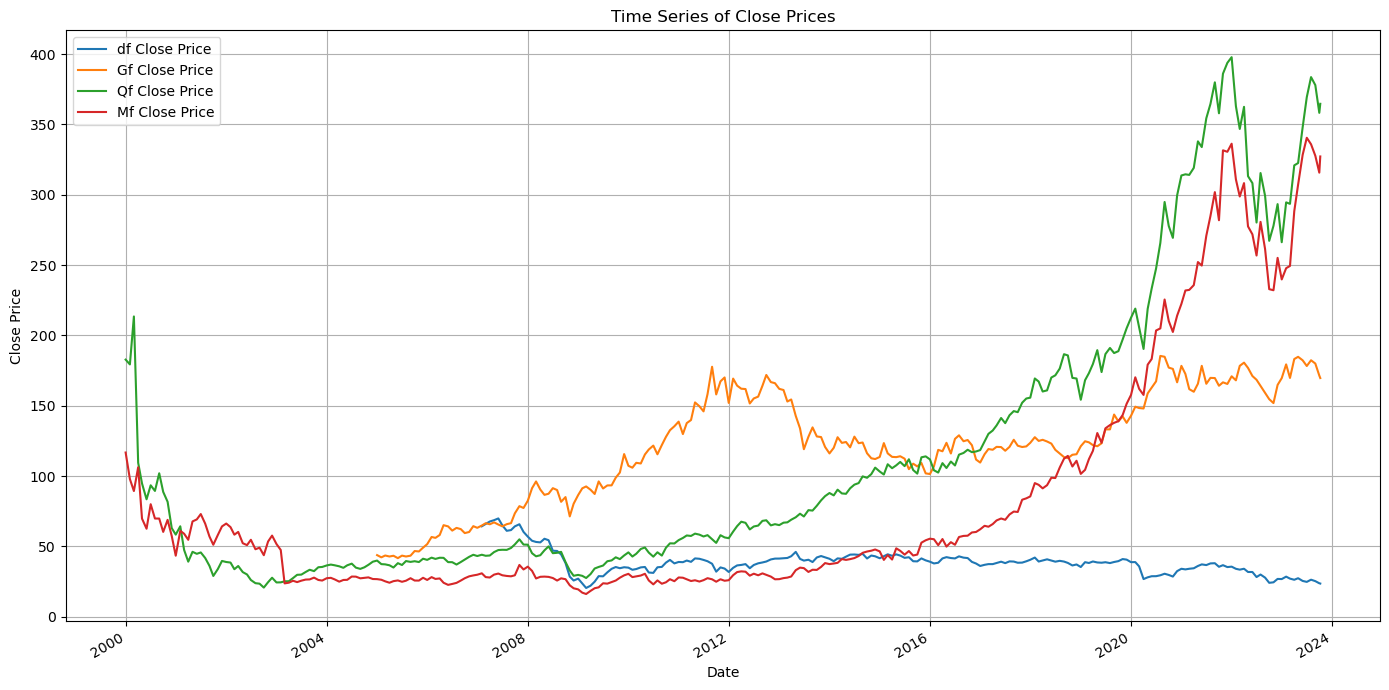

In [12]:
plt.figure(figsize=(14, 7))

# Plot for df
df['close'].plot(label='df Close Price')

# Plot for Gf
Gf['close'].plot(label='Gf Close Price')

# Plot for Qf
Qf['close'].plot(label='Qf Close Price')

# Plot for Qf
Mf['close'].plot(label='Mf Close Price')


plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    df[ma_str] = df['close'].rolling(ma).mean()
    Gf[ma_str] = Gf['close'].rolling(ma).mean()
    Qf[ma_str] = Qf['close'].rolling(ma).mean()
    Mf[ma_str] = Mf['close'].rolling(ma).mean()

In [14]:
df.head()

open   high      low  close   volume  MA: 10  MA: 20  MA: 30
timestamp                                                                
2023-10-06  23.65  23.65  22.9099  23.59  1198292     NaN     NaN     NaN
2023-09-29  25.42  25.42  23.4486  23.78  1128488     NaN     NaN     NaN
2023-08-31  26.01  26.01  24.1524  25.30  1308297     NaN     NaN     NaN
2023-07-31  24.93  26.76  24.5982  26.32  1615589     NaN     NaN     NaN
2023-06-30  25.42  26.34  24.3700  24.77  4265833     NaN     NaN     NaN

# Step 4: Calculating and plotting Moving Average

In [15]:
# For df
df['MA: 10'] = df['close'].rolling(window=10).mean()
df['MA: 20'] = df['close'].rolling(window=20).mean()
df['MA: 30'] = df['close'].rolling(window=30).mean()

# For Gf
Gf['MA: 10'] = Gf['close'].rolling(window=10).mean()
Gf['MA: 20'] = Gf['close'].rolling(window=20).mean()
Gf['MA: 30'] = Gf['close'].rolling(window=30).mean()

# For Qf
Qf['MA: 10'] = Qf['close'].rolling(window=10).mean()
Qf['MA: 20'] = Qf['close'].rolling(window=20).mean()
Qf['MA: 30'] = Qf['close'].rolling(window=30).mean()

# For Mf
Mf['MA: 10'] = Mf['close'].rolling(window=10).mean()
Mf['MA: 20'] = Mf['close'].rolling(window=20).mean()
Mf['MA: 30'] = Mf['close'].rolling(window=30).mean()


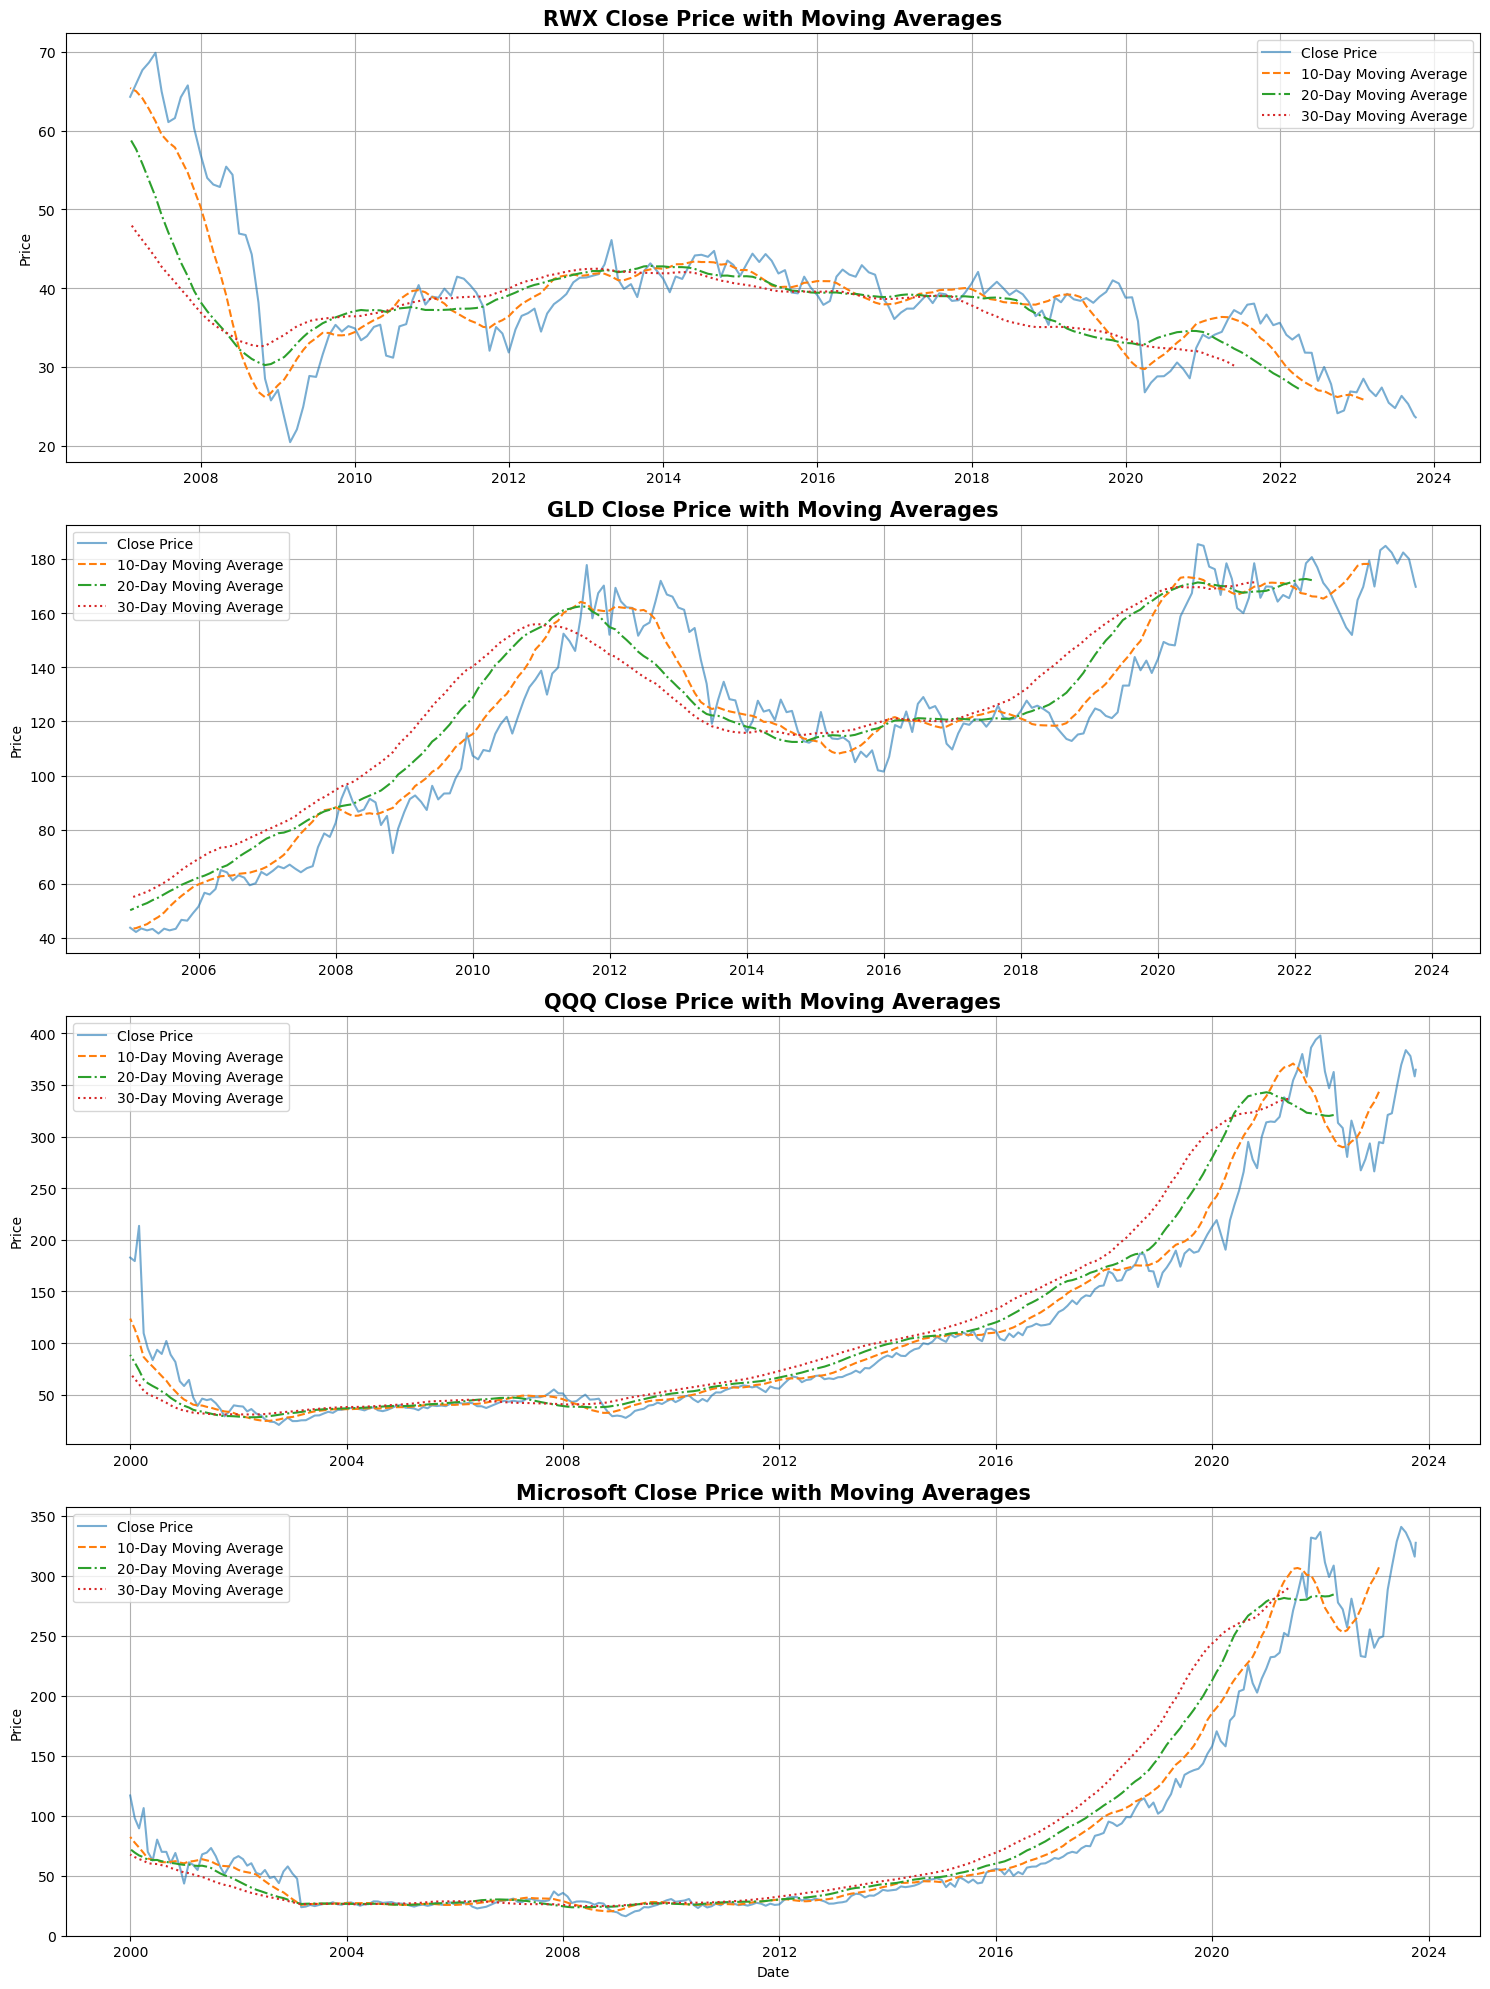

In [16]:
import matplotlib.pyplot as plt

# Calculate moving averages function
def calculate_moving_averages(data):
    data['MA: 10'] = data['close'].rolling(window=10).mean()
    data['MA: 20'] = data['close'].rolling(window=20).mean()
    data['MA: 30'] = data['close'].rolling(window=30).mean()

# Calculate moving averages for all datasets
datasets = [df, Gf, Qf, Mf]
for dataset in datasets:
    calculate_moving_averages(dataset)


def plot_moving_averages(data, ax, title):
    ax.plot(data['close'], label='Close Price', alpha=0.6)
    ax.plot(data['MA: 10'], label='10-Day Moving Average', linestyle='--')
    ax.plot(data['MA: 20'], label='20-Day Moving Average', linestyle='-.')
    ax.plot(data['MA: 30'], label='30-Day Moving Average', linestyle=':')
    ax.set_title(title, weight='bold', size=15)  # Adjusting font weight and size here
    ax.set_ylabel('Price')
    ax.legend()
    ax.grid(True)

# Rest of the code remains the same ...

# Plotting all datasets
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

plot_moving_averages(df, axes[0], 'RWX Close Price with Moving Averages')
plot_moving_averages(Gf, axes[1], 'GLD Close Price with Moving Averages')
plot_moving_averages(Qf, axes[2], 'QQQ Close Price with Moving Averages')
plot_moving_averages(Mf, axes[3], 'Microsoft Close Price with Moving Averages')

plt.xlabel('Date')
plt.tight_layout()
plt.show()




### If a long-term investment is being considered, then it is better to consider a smoother curve, since it is more resistant to sharp price jumps.

# Step 5: Plotting distribution and Correlation

In [17]:
# Calculate monthly returns for all datasets
for dataset in datasets:
    dataset['Monthly Returns'] = dataset['close'].resample('M').ffill().pct_change() * 100


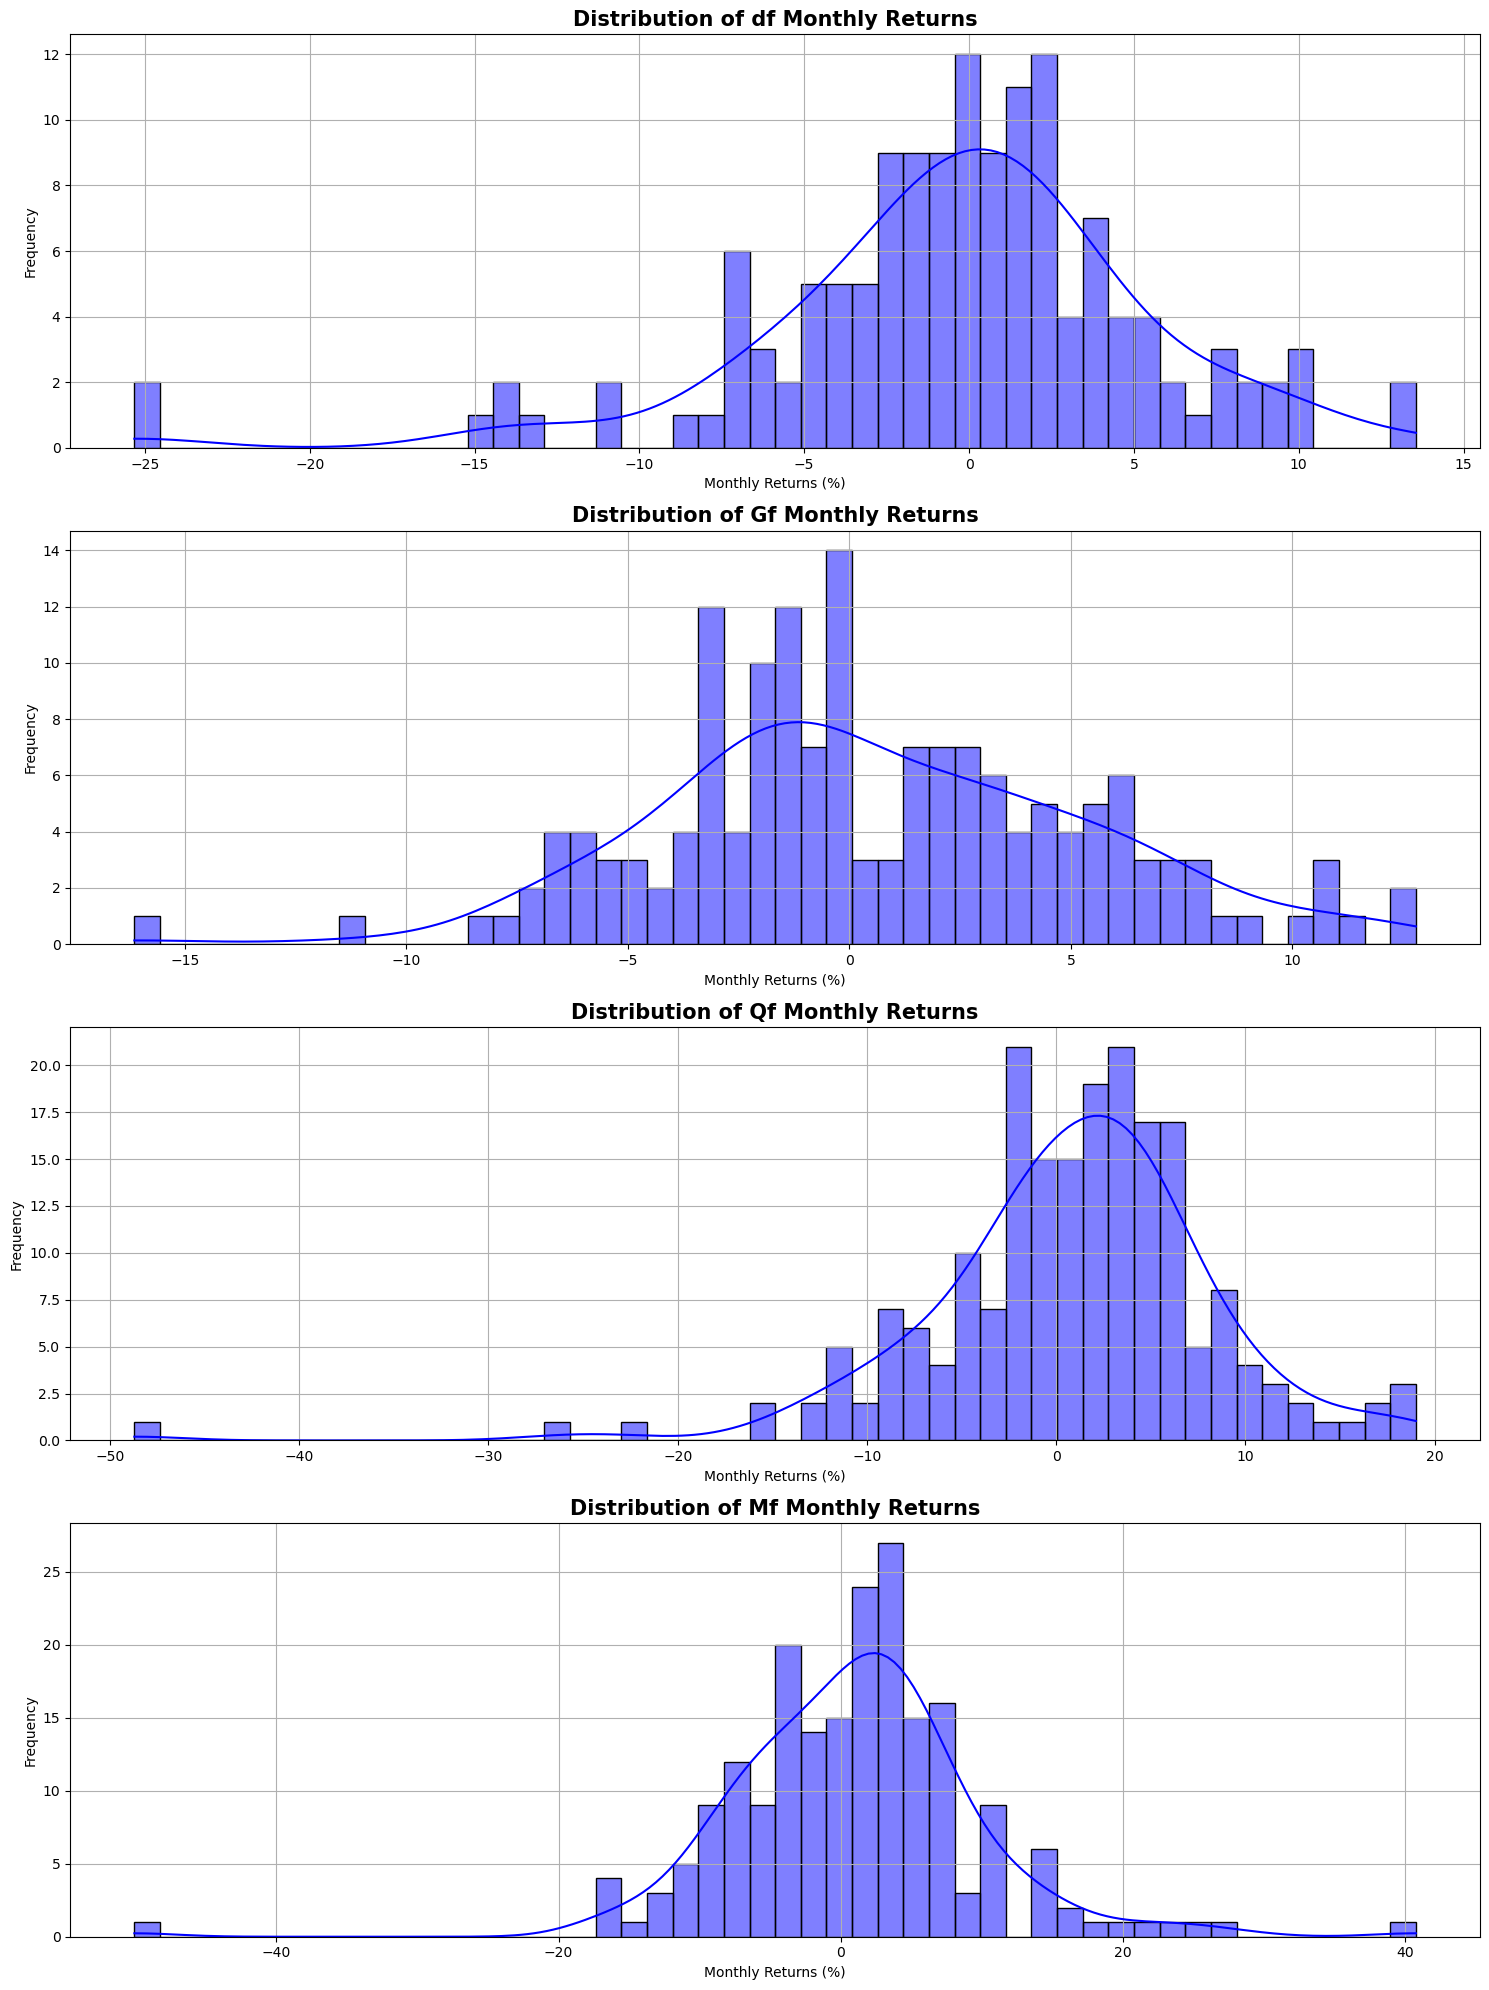

In [18]:
import seaborn as sns

def plot_monthly_returns_distribution(data, ax, title):
    sns.histplot(data['Monthly Returns'].dropna(), ax=ax, bins=50, kde=True, color='blue')  # KDE is added here
    ax.set_title(title, weight='bold', size=15)
    ax.set_xlabel('Monthly Returns (%)')
    ax.set_ylabel('Frequency')
    ax.grid(True)

fig, axes = plt.subplots(4, 1, figsize=(15, 20))

plot_monthly_returns_distribution(df, axes[0], 'Distribution of df Monthly Returns')
plot_monthly_returns_distribution(Gf, axes[1], 'Distribution of Gf Monthly Returns')
plot_monthly_returns_distribution(Qf, axes[2], 'Distribution of Qf Monthly Returns')
plot_monthly_returns_distribution(Mf, axes[3], 'Distribution of Mf Monthly Returns')

plt.tight_layout()
plt.show()


In [19]:
# Create a new DataFrame with monthly returns from each stock
returns_df = pd.DataFrame({
    'df': df['Monthly Returns'],
    'Gf': Gf['Monthly Returns'],
    'Qf': Qf['Monthly Returns'],
    'Mf': Mf['Monthly Returns']
})

correlation_matrix = returns_df.corr()


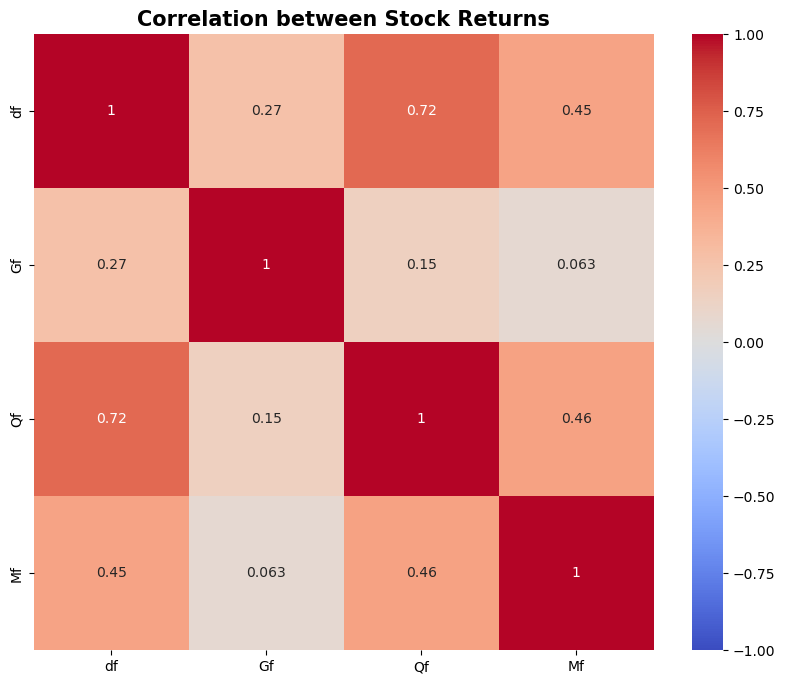

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Stock Returns', weight='bold', size=15)
plt.show()


In [21]:
for dataset in [df, Gf, Qf, Mf]:
    if not isinstance(dataset.index, pd.DatetimeIndex):
        dataset.set_index('timestamp', inplace=True)
        
        
data_list = [df['Monthly Returns'], Gf['Monthly Returns'], Qf['Monthly Returns'], Mf['Monthly Returns']]
company_list = ['df', 'Gf', 'Qf', 'Mf']

monthly_stock_returns = pd.concat(data_list, axis=1, keys=company_list)
        
    
data_list = [df['Monthly Returns'], Gf['Monthly Returns'], Qf['Monthly Returns'], Mf['Monthly Returns']]
company_list = ['df', 'Gf', 'Qf', 'Mf']

monthly_stock_returns = pd.concat(data_list, axis=1, keys=company_list)




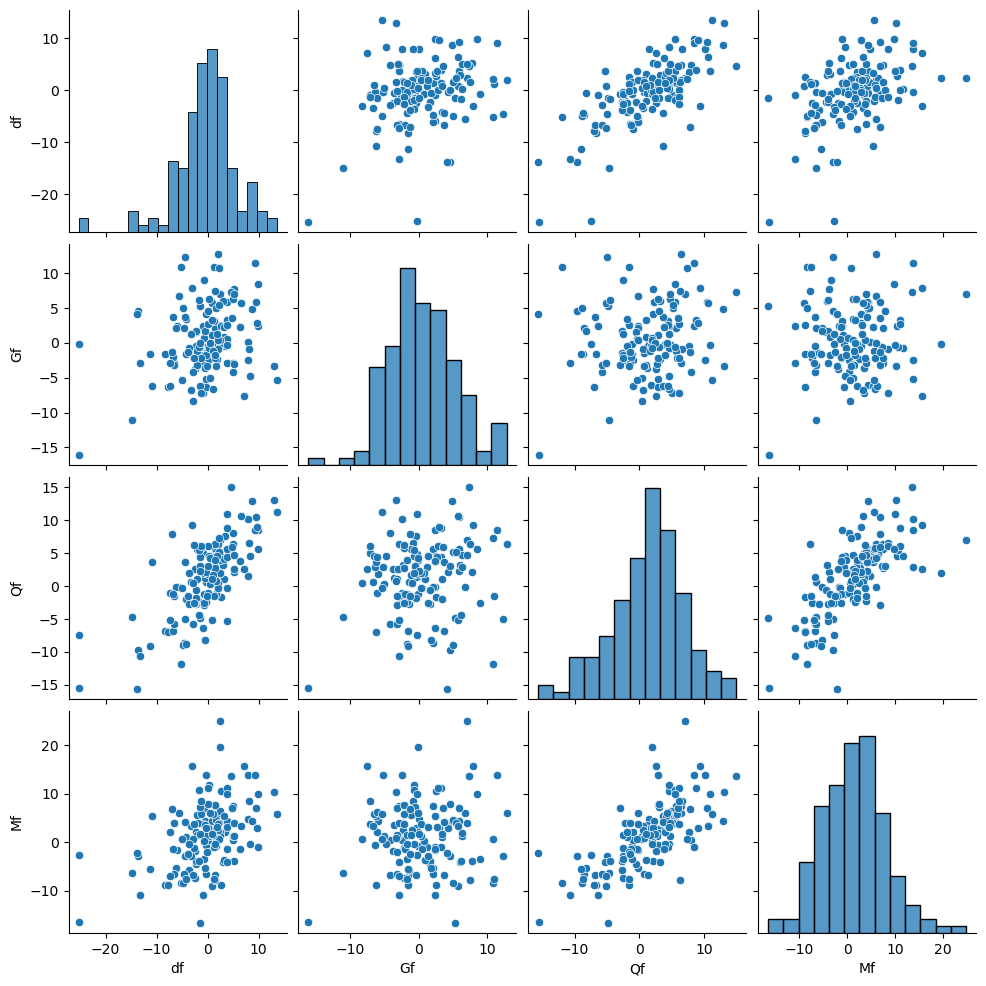

In [22]:
sns.pairplot(monthly_stock_returns.dropna())
plt.show()

From graphics we have see positive correlation, but it is within [10, 20]. RWX (SPDR Dow Jones International Real Estate ETF) and QQQ (Invesco QQQ Trust, Series 1) have the most correlated daily profits. GLD (SPDR Gold Trust) and MSFT (Microsoft Corporation)  have the lowest correlation.

In [23]:
mean_income = monthly_stock_returns .mean() # Mean income for each stock
cov_returns = monthly_stock_returns .cov() # Covariation 
count = len(monthly_stock_returns .columns)
print(mean_income, cov_returns, sep='\n')

df   -0.378862
Gf    0.598307
Qf    0.722974
Mf    1.027587
dtype: float64
           df         Gf         Qf         Mf
df  34.978240   7.875581  23.808428  17.974227
Gf   7.875581  22.963120   3.888981   1.969466
Qf  23.808428   3.888981  59.601527  31.615271
Mf  17.974227   1.969466  31.615271  79.607905


In [24]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [25]:
data_list = [df, Gf, Qf, Mf]
company_list = ['df', 'Gf', 'Qf', 'Mf']

# Assuming 'close' column contains closing prices
for dataset, company in zip(data_list, company_list):
    dataset['Monthly Returns'] = dataset['close'].resample('M').ffill().pct_change()
    dataset.dropna(inplace=True)


In [26]:
data_list = [df, Gf, Qf, Mf]
company_list = ['df', 'Gf', 'Qf', 'Mf']

# Assuming 'close' column contains closing prices
for dataset, company in zip(data_list, company_list):
    dataset['Monthly Returns'] = dataset['close'].resample('M').ffill().pct_change()
    dataset.dropna(inplace=True)
    
    # Calculate mean returns and covariance of returns
mean_returns = [data['Monthly Returns'].mean() for data in data_list]
cov_matrix = pd.concat([data['Monthly Returns'] for data in data_list], axis=1).cov()



# Step 6 Building portfolio

def log_returns(data):
    return np.log(1 + data.pct_change())


In [32]:
def drift_calc(data):
    lr = log_returns(data)
    u = lr.mean()
    var = lr.var()
    drift = u - (0.5 * var)
    return drift

In [33]:
def monthly_returns(data, months, iterations):
    drift = drift_calc(data)
    stdev = log_returns(data).std()
    Z = norm.ppf(np.random.rand(months, iterations))
    monthly_returns = np.exp(drift + stdev * Z)
    return monthly_returns


In [34]:
def monte_carlo_simulation_monthly(data, months, iterations):
    returns = monthly_returns(data, months, iterations)
    price_list = np.zeros_like(returns)
    price_list[0] = data.iloc[-1]
    for t in range(1, months):
        price_list[t] = price_list[t - 1] * returns[t]

    # Visualizing the simulation
    plt.figure(figsize=(10,5))
    plt.plot(price_list)
    plt.title('Monte Carlo Simulation for Monthly Stock Prices')
    plt.xlabel('Months')
    plt.ylabel('Stock Price')
    plt.show()

    return price_list


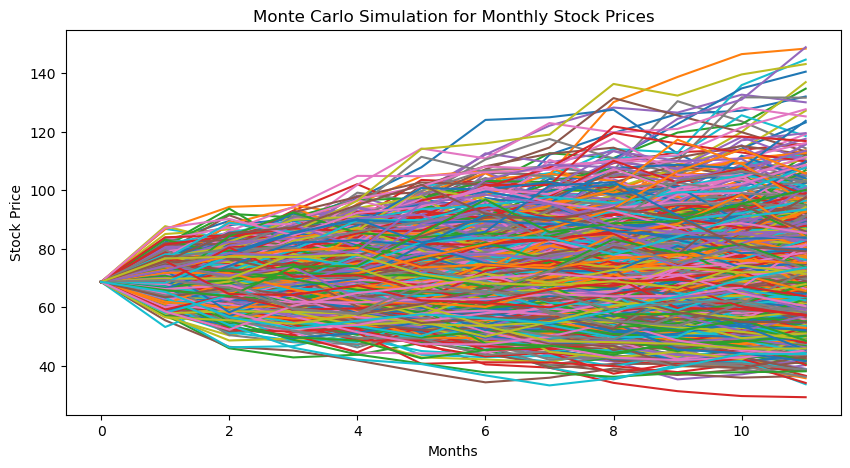

In [35]:
# Assuming your DataFrame is named 'df'
# Simulating for the next 12 months over 1000 iterations
simulation_results = monte_carlo_simulation_monthly(df['close'], 12, 1000)


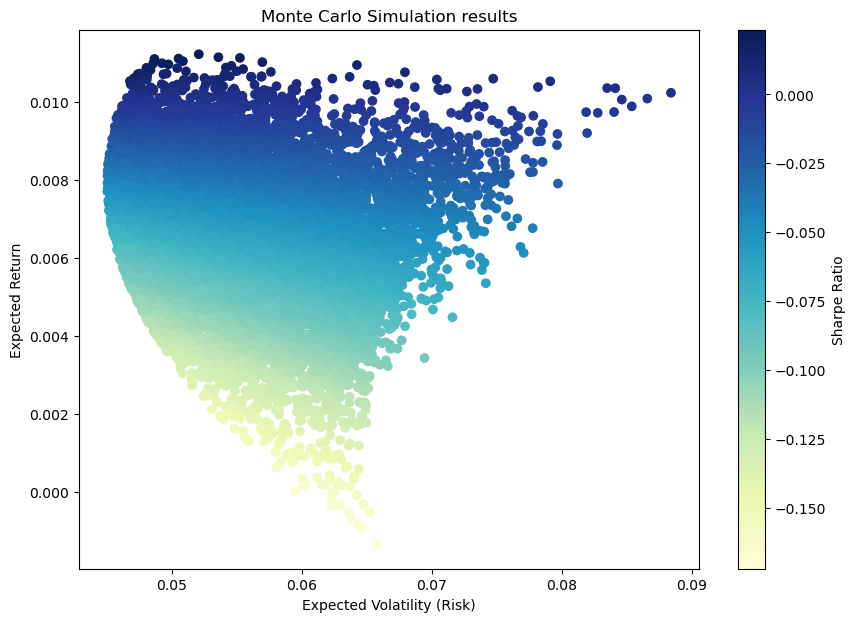

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Monte Carlo Simulation results')
plt.xlabel('Expected Volatility (Risk)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


Correlation coefficient: 0.520343189637566
Linear regression slope: 0.07943647336647496
Linear regression intercept: 30.621057693995997
R-squared (Coefficient of determination): 0.27075703500219594


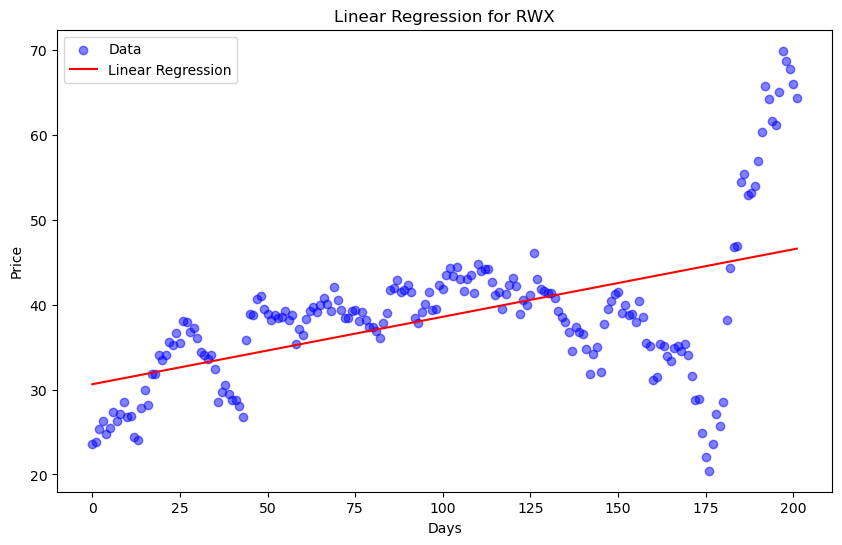

In [61]:

from scipy import stats

# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = df['close']  # Assuming 'close' contains the price data
days = df.index  # Assuming the index (timestamps) represent days

# Calculate the correlation between 'Price' and 'Days'
correlation = np.corrcoef(price, days)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the regression results
print("Linear regression slope:", slope)
print("Linear regression intercept:", intercept)
print("R-squared (Coefficient of determination):", r_value**2)



# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = df['close']  # Assuming 'close' contains the price data
days = df.index  # Assuming the index (timestamps) represent days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days, price, label="Data", color='b', alpha=0.5)

# Add the regression line
regression_line = slope * days + intercept
plt.plot(days, regression_line, label="Linear Regression", color='r')

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Linear Regression for RWX")

# Display the plot
plt.legend()
plt.show()



Correlation coefficient: -0.8035620850681392
Linear regression slope: -0.9701819225997578
Linear regression intercept: 252.65877974012773
R-squared (Coefficient of determination): 0.6457120245590552


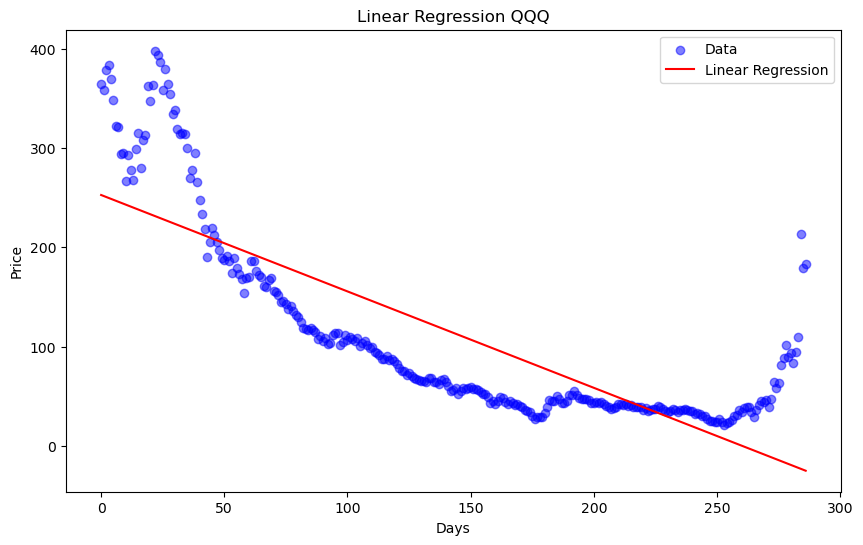

In [60]:

from scipy import stats

# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Qf['close']  # Assuming 'close' contains the price data
days = Qf.index  # Assuming the index (timestamps) represent days

# Calculate the correlation between 'Price' and 'Days'
correlation = np.corrcoef(price, days)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the regression results
print("Linear regression slope:", slope)
print("Linear regression intercept:", intercept)
print("R-squared (Coefficient of determination):", r_value**2)



# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Qf['close']  # Assuming 'close' contains the price data
days = Qf.index  # Assuming the index (timestamps) represent days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days, price, label="Data", color='b', alpha=0.5)

# Add the regression line
regression_line = slope * days + intercept
plt.plot(days, regression_line, label="Linear Regression", color='r')

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Linear Regression QQQ")

# Display the plot
plt.legend()
plt.show()


Correlation coefficient: -0.7979429020989858
Linear regression slope: -0.46690108849762707
Linear regression intercept: 174.7678785068398
R-squared (Coefficient of determination): 0.6367128750101513


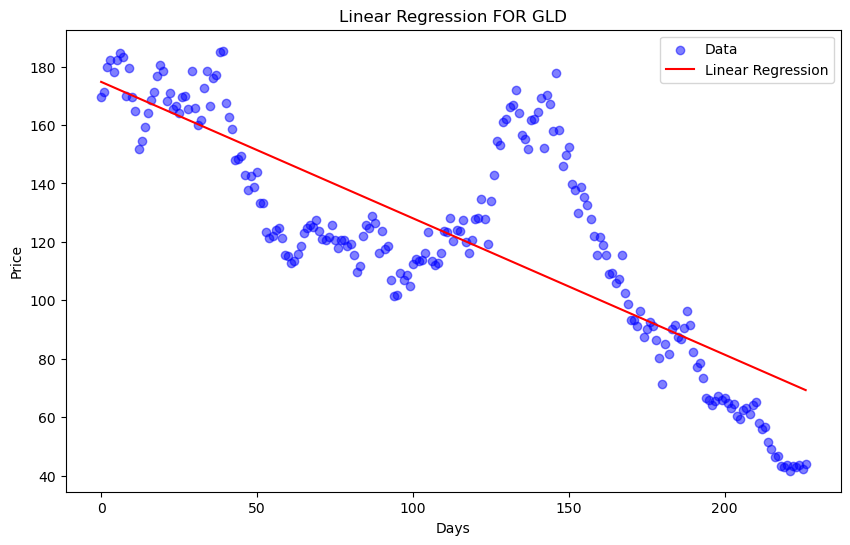

In [62]:

from scipy import stats

# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Gf['close']  # Assuming 'close' contains the price data
days = Gf.index  # Assuming the index (timestamps) represent days

# Calculate the correlation between 'Price' and 'Days'
correlation = np.corrcoef(price, days)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the regression results
print("Linear regression slope:", slope)
print("Linear regression intercept:", intercept)
print("R-squared (Coefficient of determination):", r_value**2)



# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Gf['close']  # Assuming 'close' contains the price data
days = Gf.index  # Assuming the index (timestamps) represent days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days, price, label="Data", color='b', alpha=0.5)

# Add the regression line
regression_line = slope * days + intercept
plt.plot(days, regression_line, label="Linear Regression", color='r')

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Linear Regression FOR GLD")

# Display the plot
plt.legend()
plt.show()


Correlation coefficient: -0.692990404385492
Linear regression slope: -0.7118076309868993
Linear regression intercept: 183.39490133565621
R-squared (Coefficient of determination): 0.4802357005703677


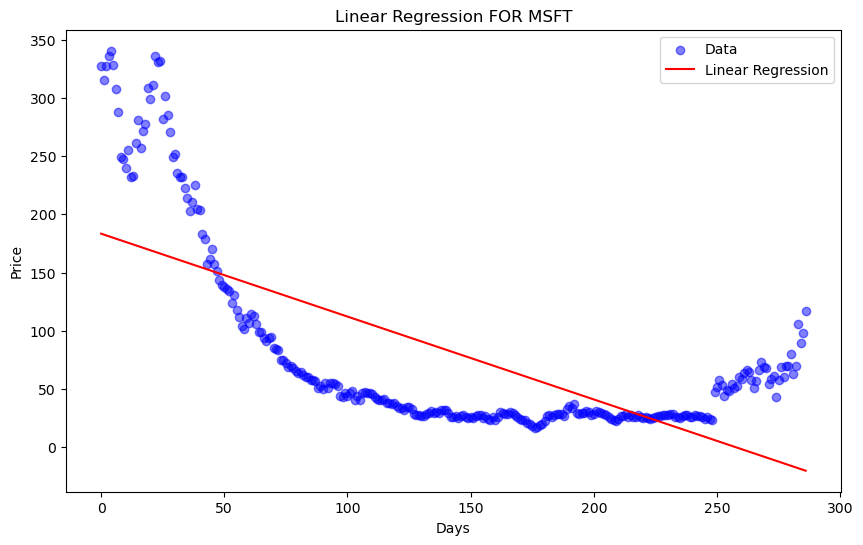

In [63]:

from scipy import stats

# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Mf['close']  # Assuming 'close' contains the price data
days = Mf.index  # Assuming the index (timestamps) represent days

# Calculate the correlation between 'Price' and 'Days'
correlation = np.corrcoef(price, days)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# Print the regression results
print("Linear regression slope:", slope)
print("Linear regression intercept:", intercept)
print("R-squared (Coefficient of determination):", r_value**2)



# Assuming 'df' is the DataFrame containing your data

# Extract the 'Price' and 'Days' columns
price = Mf['close']  # Assuming 'close' contains the price data
days = Mf.index  # Assuming the index (timestamps) represent days

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(days, price)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(days, price, label="Data", color='b', alpha=0.5)

# Add the regression line
regression_line = slope * days + intercept
plt.plot(days, regression_line, label="Linear Regression", color='r')

# Set labels and title
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Linear Regression FOR MSFT")

# Display the plot
plt.legend()
plt.show()


## CAPM and Sharpe

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define the stock tickers
stock_tickers = ["QQQ", "MSFT", "GLD", "RWX"]
market_ticker = "^GSPC"  # S&P 500 as the market index

# Define the risk-free rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.015  # Example value, you can replace with the current rate

# Set the date range for historical data
start_date = "2010-01-01"
end_date = "2022-12-31"

# Download historical stock and market data
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)
market_data = yf.download(market_ticker, start=start_date, end=end_date)

# Calculate log returns for stocks and the market
stock_returns = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))
market_returns = np.log(market_data["Adj Close"] / market_data["Adj Close"].shift(1))

# Calculate the Beta of each stock
betas = {}
for stock_ticker in stock_tickers:
    covariance_matrix = np.cov(stock_returns[stock_ticker], market_returns, ddof=1)
    beta = covariance_matrix[0, 1] / np.var(market_returns, ddof=1)
    betas[stock_ticker] = beta

# Calculate the CAPM expected return for each stock
capm_expected_returns = {}
for stock_ticker in stock_tickers:
    expected_return = risk_free_rate + betas[stock_ticker] * (market_returns.mean() * 252 - risk_free_rate)
    capm_expected_returns[stock_ticker] = expected_return

# Calculate the Sharpe Ratio for each stock
sharpe_ratios = {}
for stock_ticker in stock_tickers:
    excess_returns = stock_returns[stock_ticker] - risk_free_rate
    sharpe_ratio = (excess_returns.mean() * 252) / (excess_returns.std() * np.sqrt(252))
    sharpe_ratios[stock_ticker] = sharpe_ratio

# Display the results
for stock_ticker in stock_tickers:
    print(f"Stock: {stock_ticker}")
    print(f"Beta: {betas[stock_ticker]}")
    print(f"CAPM Expected Return: {capm_expected_returns[stock_ticker]}")
    print(f"Sharpe Ratio: {sharpe_ratios[stock_ticker]}")
    print()

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed
Stock: QQQ
Beta: nan
CAPM Expected Return: nan
Sharpe Ratio: -17.443145563613257

Stock: MSFT
Beta: nan
CAPM Expected Return: nan
Sharpe Ratio: -13.852768348675099

Stock: GLD
Beta: nan
CAPM Expected Return: nan
Sharpe Ratio: -23.830797845704204

Stock: RWX
Beta: nan
CAPM Expected Return: nan
Sharpe Ratio: -20.81055735312792



# Step 7:  Brownian Motion

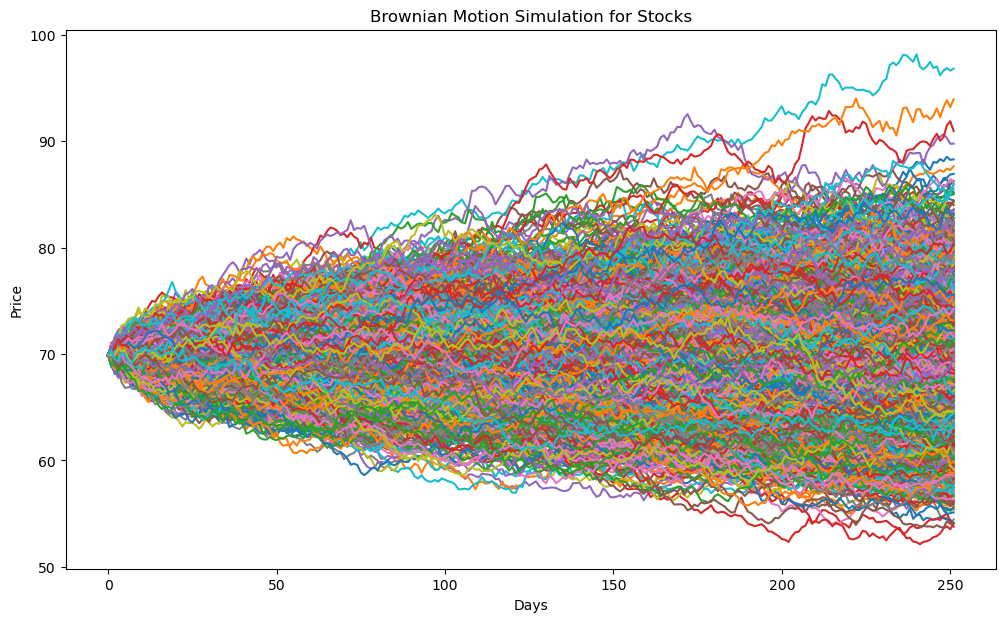

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load historical price data from CSV files
Gf = pd.read_csv(r"C:\Users\netsh\Downloads\GLD_rands.csv")
Qf = pd.read_csv(r"C:\Users\netsh\Downloads\QQQ_rand.csv")
df = pd.read_csv(r"C:\Users\netsh\Downloads\RWX_rands.csv")
Mf = pd.read_csv(r"C:\Users\netsh\Downloads\MSFT_rands.csv")

# Specify simulation parameters
start_price = 69.89  # Initial price
days = 252  # Number of days for the simulation (1 year)
simulations = 1000  # Number of simulations

# Define a function to perform Brownian Motion simulation
def brownian_motion(start_price, days, mu, sigma):
    dt = 1/252.0  # Daily time interval (252 trading days in a year)
    price = np.zeros(days)
    price[0] = start_price

    for day in range(1, days):
        drift = (mu - 0.5 * sigma**2) * dt
        shock = sigma * np.sqrt(dt) * np.random.normal(0, 1)
        price[day] = price[day - 1] * np.exp(drift + shock)

    return price

# Perform Monte Carlo simulations for each stock
simulated_prices = {
    'GLD': [],
    'QQQ': [],
    'RWX': [],
    'MSFT': [],
}

for _ in range(simulations):
    for stock_data, stock_symbol in zip([Gf, Qf, df, Mf], ['GLD', 'QQQ', 'RWX', 'MSFT']):
        log_returns = np.log(1 + stock_data['close'].pct_change()).dropna()
        mu = log_returns.mean()
        sigma = log_returns.std()
        simulated_price = brownian_motion(start_price, days, mu, sigma)
        simulated_prices[stock_symbol].append(simulated_price)

# Plot the simulated prices for each stock
plt.figure(figsize=(12, 7))

for stock_symbol, prices in simulated_prices.items():
    for price in prices:
        plt.plot(price)

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Brownian Motion Simulation for Stocks')
plt.show()


Statistics for GLD:
Mean Daily Return: -1.8072039831032152
Volatility (Annualized): 0.7707008347031226
Sharpe Ratio: -2.3643467102317794
Risk-Adjusted Returns: -2.3448839053085466
Probability of a Return < -0.01: 0.9901472527018849


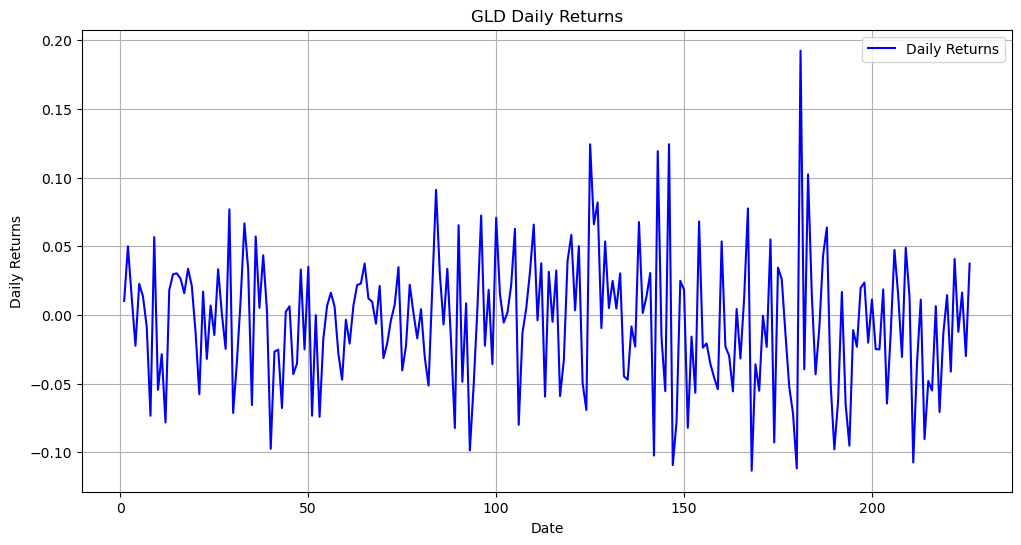

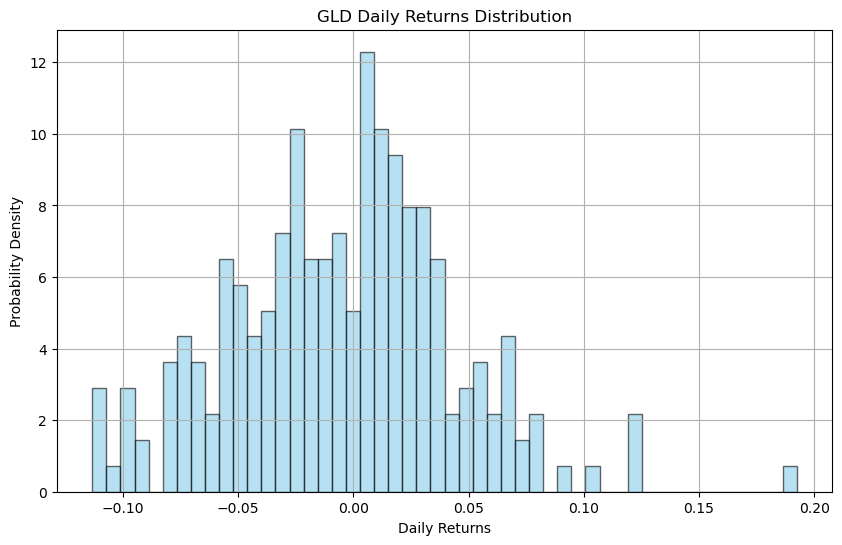

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load GLD stock data from the CSV file
gld_data = pd.read_csv(r"C:\Users\netsh\Downloads\GLD_rands.csv")

# Calculate logarithmic daily returns
gld_data['Log Returns'] = np.log(1 + gld_data['close'].pct_change())

# Calculate daily returns (simple returns)
gld_data['Daily Returns'] = gld_data['close'].pct_change()

# Define risk-free rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.015  # Example rate

# Calculate the drift (expected daily return)
gld_data['Drift'] = (gld_data['Log Returns'].mean() - (0.5 * gld_data['Log Returns'].var())) * 252

# Calculate the standard deviation (volatility)
gld_data['Volatility'] = gld_data['Log Returns'].std() * np.sqrt(252)

# Calculate the Sharpe Ratio
gld_data['Sharpe Ratio'] = (gld_data['Drift'] - risk_free_rate) / gld_data['Volatility']

# Calculate risk-adjusted returns
gld_data['Risk-Adjusted Returns'] = gld_data['Drift'] / gld_data['Volatility']

# Calculate the Beta (measure of systematic risk)
# For Beta calculation, you need a market index like the S&P 500 (not provided in the data)
# You can calculate Beta using regression or other methods.

# Define a specific outcome threshold (e.g., 1% loss)
threshold = -0.01  # Example threshold

# Calculate the probability of the stock having a return below the threshold
gld_data['Probability'] = norm.cdf(threshold, gld_data['Drift'], gld_data['Volatility'])

# Plot daily returns and calculate statistics
plt.figure(figsize=(12, 6))
plt.plot(gld_data.index, gld_data['Daily Returns'], label='Daily Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('GLD Daily Returns')
plt.legend()
plt.grid(True)

# Print calculated statistics
print("Statistics for GLD:")
print("Mean Daily Return:", gld_data['Drift'].mean())
print("Volatility (Annualized):", gld_data['Volatility'].mean())
print("Sharpe Ratio:", gld_data['Sharpe Ratio'].mean())
print("Risk-Adjusted Returns:", gld_data['Risk-Adjusted Returns'].mean())
print("Probability of a Return < {}:".format(threshold), gld_data['Probability'].mean())

# Plot the probability distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(gld_data['Daily Returns'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Probability Density')
plt.title('GLD Daily Returns Distribution')
plt.grid(True)
plt.show()


Statistics for QQQ:
Mean Daily Return: -1.404924411197345
Volatility (Annualized): 1.262023037442821
Sharpe Ratio: -1.125117663521002
Risk-Adjusted Returns: -1.1132319850864834
Probability of a Return < -0.01: 0.8654869668882396


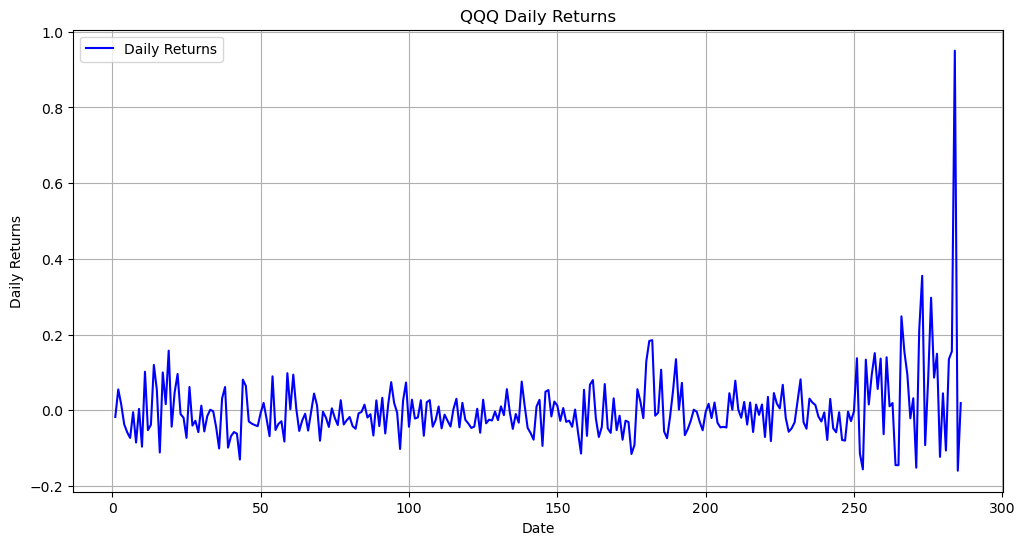

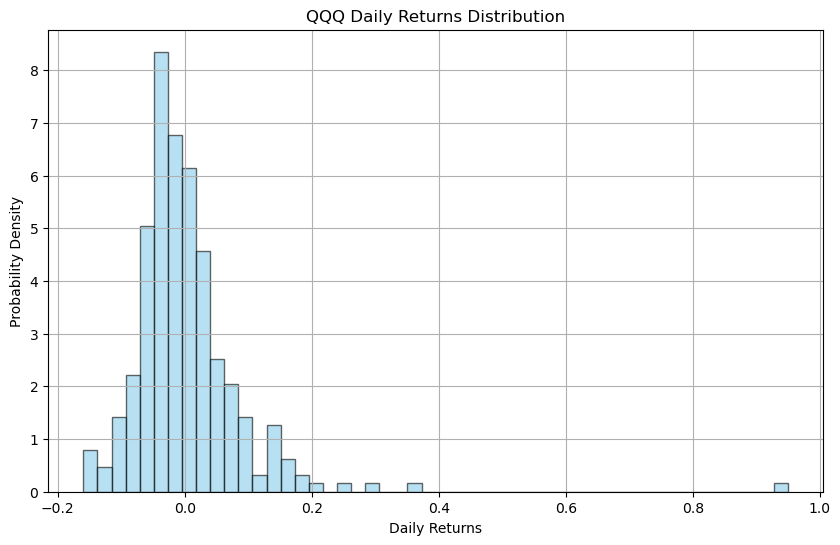

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


QQQ_data = pd.read_csv(r"C:\Users\netsh\Downloads\QQQ_rand.csv")

# Calculate logarithmic daily returns
QQQ_data['Log Returns'] = np.log(1 + QQQ_data['close'].pct_change())

# Calculate daily returns (simple returns)
QQQ_data['Daily Returns'] = QQQ_data['close'].pct_change()

# Define risk-free rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.015  # Example rate

# Calculate the drift (expected daily return)
QQQ_data['Drift'] = (QQQ_data['Log Returns'].mean() - (0.5 * QQQ_data['Log Returns'].var())) * 252

# Calculate the standard deviation (volatility)
QQQ_data['Volatility'] = QQQ_data['Log Returns'].std() * np.sqrt(252)

# Calculate the Sharpe Ratio
QQQ_data['Sharpe Ratio'] = (QQQ_data['Drift'] - risk_free_rate) / QQQ_data['Volatility']

# Calculate risk-adjusted returns
QQQ_data['Risk-Adjusted Returns'] = QQQ_data['Drift'] / QQQ_data['Volatility']

# Calculate the Beta (measure of systematic risk)
# For Beta calculation, you need a market index like the S&P 500 (not provided in the data)
# You can calculate Beta using regression or other methods.

# Define a specific outcome threshold (e.g., 1% loss)
threshold = -0.01  # Example threshold

# Calculate the probability of the stock having a return below the threshold
QQQ_data['Probability'] = norm.cdf(threshold, QQQ_data['Drift'], QQQ_data['Volatility'])

# Plot daily returns and calculate statistics
plt.figure(figsize=(12, 6))
plt.plot(QQQ_data.index, QQQ_data['Daily Returns'], label='Daily Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('QQQ Daily Returns')
plt.legend()
plt.grid(True)

# Print calculated statistics
print("Statistics for QQQ:")
print("Mean Daily Return:", QQQ_data['Drift'].mean())
print("Volatility (Annualized):", QQQ_data['Volatility'].mean())
print("Sharpe Ratio:", QQQ_data['Sharpe Ratio'].mean())
print("Risk-Adjusted Returns:", QQQ_data['Risk-Adjusted Returns'].mean())
print("Probability of a Return < {}:".format(threshold), QQQ_data['Probability'].mean())

# Plot the probability distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(QQQ_data['Daily Returns'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Probability Density')
plt.title('QQQ Daily Returns Distribution')
plt.grid(True)
plt.show()


Statistics for RWX:
Mean Daily Return: 0.8079856276696342
Volatility (Annualized): 0.947815224189011
Sharpe Ratio: 0.8366458012405787
Risk-Adjusted Returns: 0.8524716706898007
Probability of a Return < -0.01: 0.19406261676716308


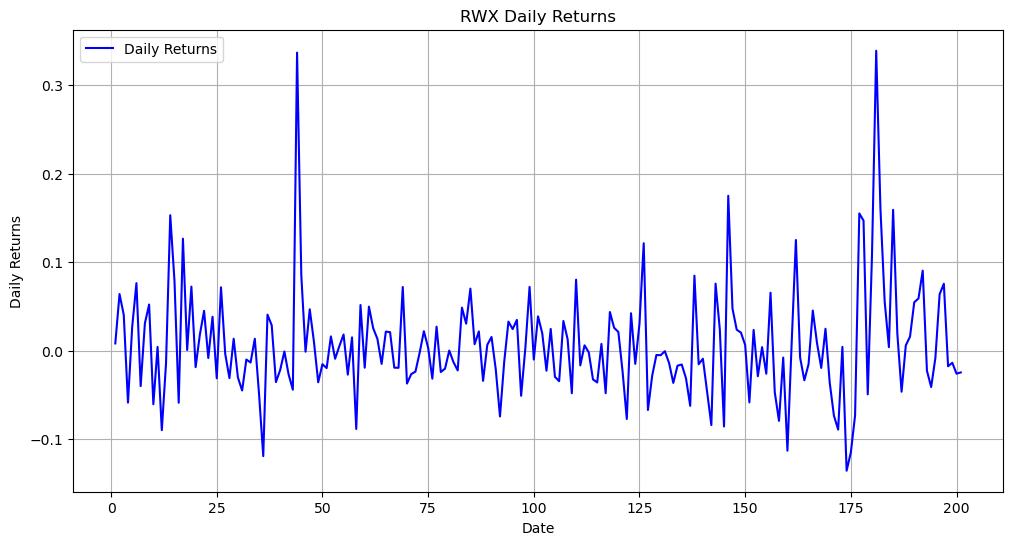

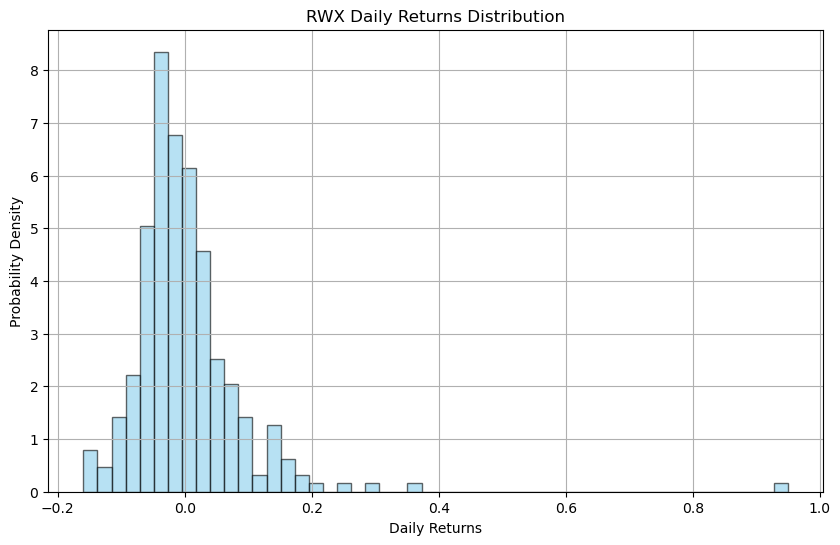

In [45]:
# Load RWX stock data from the CSV file
RWX_data = pd.read_csv(r"C:\Users\netsh\Downloads\RWX_rands.csv")

# Calculate logarithmic daily returns
RWX_data['Log Returns'] = np.log(1 + RWX_data['close'].pct_change())

# Calculate daily returns (simple returns)
RWX_data['Daily Returns'] = RWX_data['close'].pct_change()

# Define risk-free rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.015  # Example rate

# Calculate the drift (expected daily return)
RWX_data['Drift'] = (RWX_data['Log Returns'].mean() - (0.5 * RWX_data['Log Returns'].var())) * 252

# Calculate the standard deviation (volatility)
RWX_data['Volatility'] = RWX_data['Log Returns'].std() * np.sqrt(252)

# Calculate the Sharpe Ratio
RWX_data['Sharpe Ratio'] = (RWX_data['Drift'] - risk_free_rate) / RWX_data['Volatility']

# Calculate risk-adjusted returns
RWX_data['Risk-Adjusted Returns'] = RWX_data['Drift'] / RWX_data['Volatility']

# Calculate the Beta (measure of systematic risk)
# For Beta calculation, you need a market index like the S&P 500 (not provided in the data)
# You can calculate Beta using regression or other methods.

# Define a specific outcome threshold (e.g., 1% loss)
threshold = -0.01  # Example threshold

# Calculate the probability of the stock having a return below the threshold
RWX_data['Probability'] = norm.cdf(threshold, RWX_data['Drift'], RWX_data['Volatility'])

# Plot daily returns and calculate statistics
plt.figure(figsize=(12, 6))
plt.plot(RWX_data.index, RWX_data['Daily Returns'], label='Daily Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('RWX Daily Returns')
plt.legend()
plt.grid(True)

# Print calculated statistics
print("Statistics for RWX:")
print("Mean Daily Return:", RWX_data['Drift'].mean())
print("Volatility (Annualized):", RWX_data['Volatility'].mean())
print("Sharpe Ratio:", RWX_data['Sharpe Ratio'].mean())
print("Risk-Adjusted Returns:", RWX_data['Risk-Adjusted Returns'].mean())
print("Probability of a Return < {}:".format(threshold), RWX_data['Probability'].mean())

# Plot the probability distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(QQQ_data['Daily Returns'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Probability Density')
plt.title('RWX Daily Returns Distribution')
plt.grid(True)
plt.show()


Statistics for MSFT:
Mean Daily Return: 0.8079856276696342
Volatility (Annualized): 0.947815224189011
Sharpe Ratio: 0.8366458012405787
Risk-Adjusted Returns: 0.8524716706898007
Probability of a Return < -0.01: 0.19406261676716308


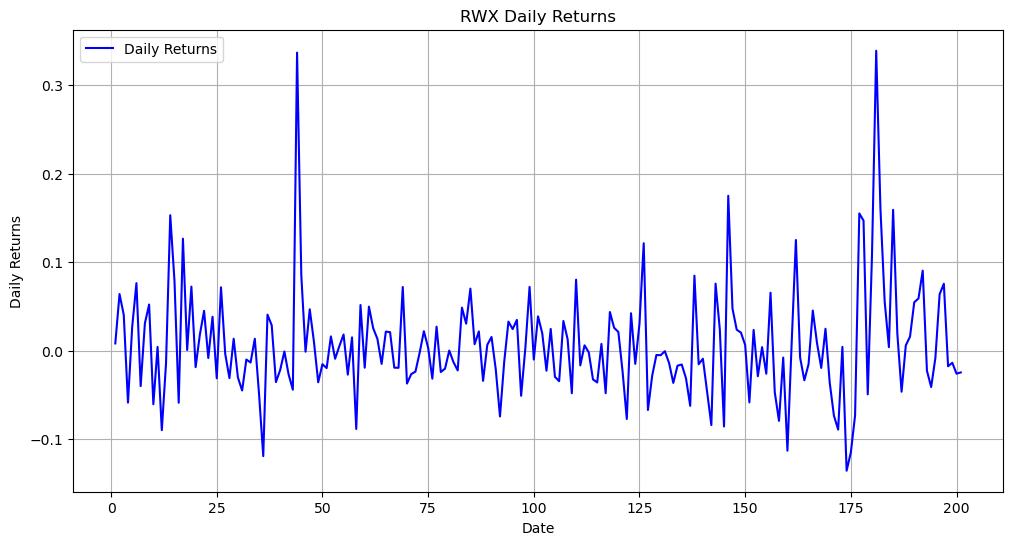

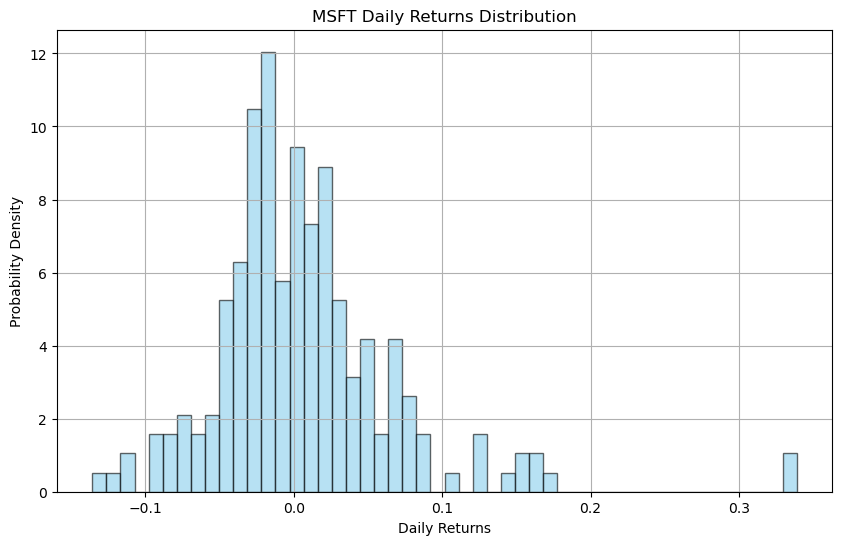

In [46]:
# Load MSFT stock data from the CSV file
MSFT_data = pd.read_csv(r"C:\Users\netsh\Downloads\RWX_rands.csv")

# Calculate logarithmic daily returns
MSFT_data['Log Returns'] = np.log(1 + MSFT_data['close'].pct_change())

# Calculate daily returns (simple returns)
MSFT_data['Daily Returns'] = MSFT_data['close'].pct_change()

# Define risk-free rate (e.g., 10-year US Treasury yield)
risk_free_rate = 0.015  # Example rate

# Calculate the drift (expected daily return)
MSFT_data['Drift'] = (MSFT_data['Log Returns'].mean() - (0.5 * MSFT_data['Log Returns'].var())) * 252

# Calculate the standard deviation (volatility)
MSFT_data['Volatility'] = MSFT_data['Log Returns'].std() * np.sqrt(252)

# Calculate the Sharpe Ratio
MSFT_data['Sharpe Ratio'] = (MSFT_data['Drift'] - risk_free_rate) / MSFT_data['Volatility']

# Calculate risk-adjusted returns
MSFT_data['Risk-Adjusted Returns'] = MSFT_data['Drift'] / MSFT_data['Volatility']

# Calculate the Beta (measure of systematic risk)
# For Beta calculation, you need a market index like the S&P 500 (not provided in the data)
# You can calculate Beta using regression or other methods.

# Define a specific outcome threshold (e.g., 1% loss)
threshold = -0.01  # Example threshold

# Calculate the probability of the stock having a return below the threshold
MSFT_data['Probability'] = norm.cdf(threshold, MSFT_data['Drift'], MSFT_data['Volatility'])

# Plot daily returns and calculate statistics
plt.figure(figsize=(12, 6))
plt.plot(RWX_data.index, RWX_data['Daily Returns'], label='Daily Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('RWX Daily Returns')
plt.legend()
plt.grid(True)

# Print calculated statistics
print("Statistics for MSFT:")
print("Mean Daily Return:", MSFT_data['Drift'].mean())
print("Volatility (Annualized):", MSFT_data['Volatility'].mean())
print("Sharpe Ratio:", MSFT_data['Sharpe Ratio'].mean())
print("Risk-Adjusted Returns:", MSFT_data['Risk-Adjusted Returns'].mean())
print("Probability of a Return < {}:".format(threshold), MSFT_data['Probability'].mean())

# Plot the probability distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(MSFT_data['Daily Returns'], bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Daily Returns')
plt.ylabel('Probability Density')
plt.title('MSFT Daily Returns Distribution')
plt.grid(True)
plt.show()


# Step 8: Monte Carlo simulation

In [28]:
days = 365
dt = 1 / days
monthly_stock_returns.dropna(inplace=True)

mu = monthly_stock_returns.mean()
sigma = monthly_stock_returns.std()

In [29]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [30]:
print(df.tail())

             open   high    low  close   volume    MA: 10     MA: 20  \
timestamp                                                              
2007-05-31  68.75  71.12  67.70  69.89  4036500  61.19699  51.605145   
2007-04-30  67.75  69.66  67.40  68.65  3600300  62.74600  53.683645   
2007-03-30  64.54  67.90  60.80  67.70  3143900  64.11600  55.781645   
2007-02-28  65.05  69.40  64.89  65.93  4154700  65.01400  57.653145   
2007-01-31  64.00  64.48  61.10  64.30  3718900  65.41400  58.959995   

               MA: 30  Monthly Returns  
timestamp                               
2007-05-31  43.872097         1.806264  
2007-04-30  45.010763         1.403250  
2007-03-30  46.089430              NaN  
2007-02-28  47.151763         2.534992  
2007-01-31  48.243430              NaN  


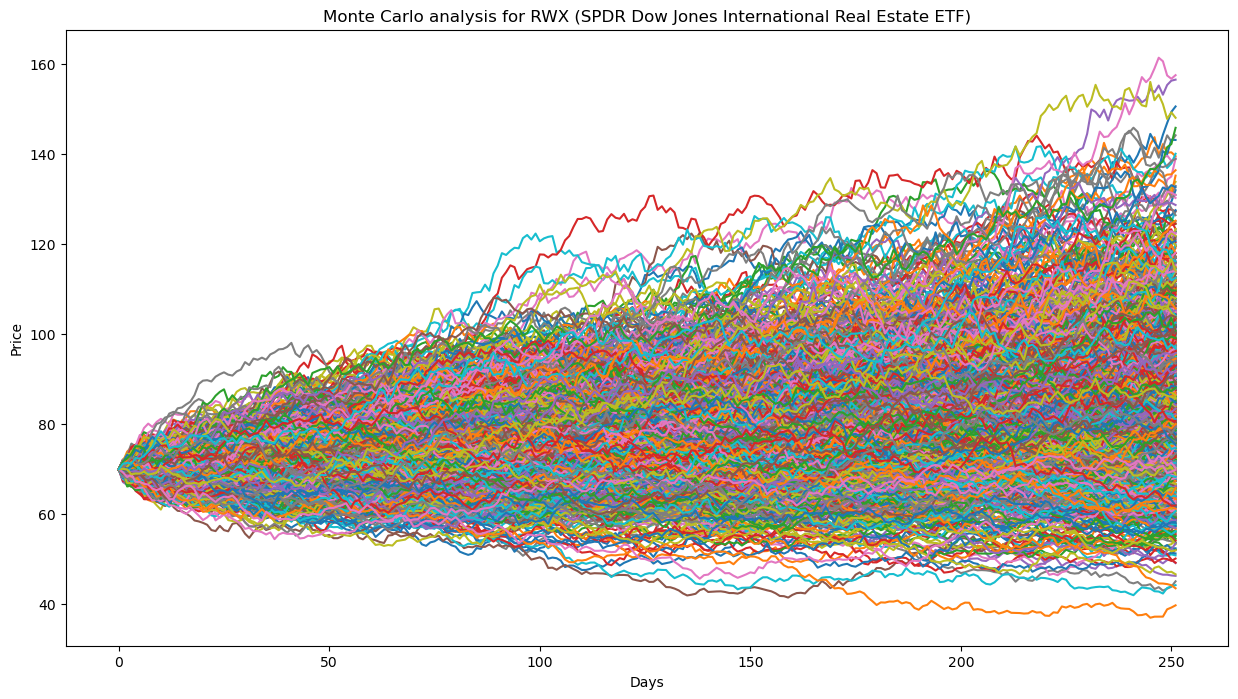

In [48]:

# Define the parameters
start_price = 69.89
days = 252  # Number of days for the simulation
mu = 0.1  # Expected return (daily)
sigma = 0.2  # Standard deviation (daily)
dt = 1/252  # Time increment (daily)

# Define the Monte Carlo function
def monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

# Simulate the Monte Carlo analysis
sim = np.zeros((1000, days))

for i in range(1000):
    result = monte_carlo(start_price, days, mu, sigma, dt)
    sim[i] = result

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(1000):
    plt.plot(sim[i])

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for RWX (SPDR Dow Jones International Real Estate ETF)')

plt.show()

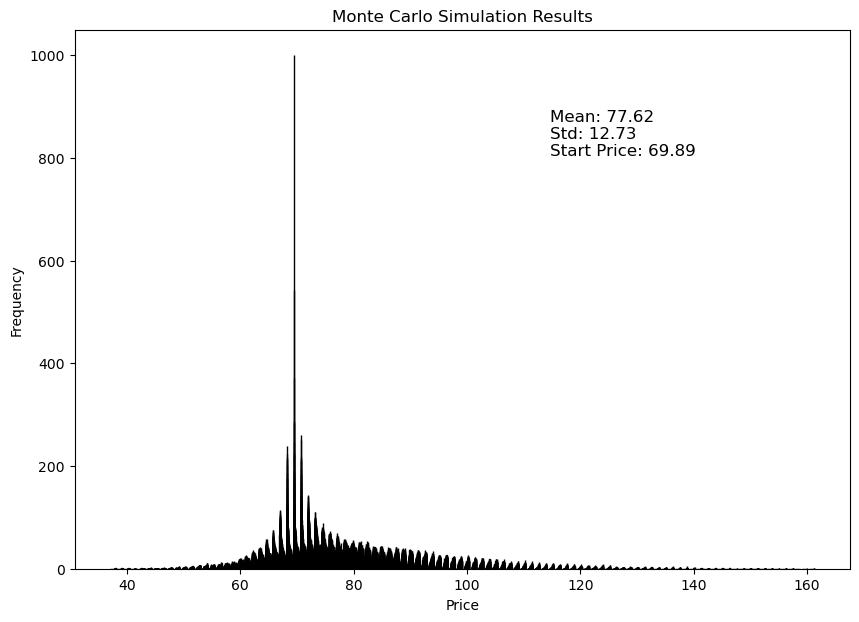

In [50]:
# Set figure size
plt.figure(figsize=(10, 7))

# Create a histogram
plt.hist(sim, bins=100, edgecolor='black')

# Display mean, standard deviation, and start price as text on the plot
plt.figtext(0.6, 0.7, f"Mean: {sim.mean():.2f}\nStd: {sim.std():.2f}\nStart Price: {start_price:.2f}", fontsize=12, color='black')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation Results')

# Show the plot
plt.show()


Start price was 69.89, mean final price is 77.58. As we can see, start price is lower then final price. Although the variance is small

In [29]:
print(Mf.tail())

             open    high    low   close      volume  MA: 10   MA: 20  \
timestamp                                                               
2000-07-31  79.69   82.87  67.25   69.81   617092900  61.206  61.9655   
2000-06-30  64.37   82.19  63.81   80.00   733525100  62.431  63.0485   
2000-05-31  72.87   74.00  60.38   62.56   672215400  63.218  62.9910   
2000-03-31  89.62  115.00  88.94  106.25  1014093800  68.812  65.2680   
2000-02-29  98.50  110.00  88.12   89.37   667243800  73.411  66.8290   

               MA: 30  Monthly Returns  
timestamp                               
2000-07-31  58.704667        -0.127375  
2000-06-30  59.648000         0.278772  
2000-05-31  59.810667        -0.411200  
2000-03-31  62.437000         0.188878  
2000-02-29  63.780000        -0.086850  


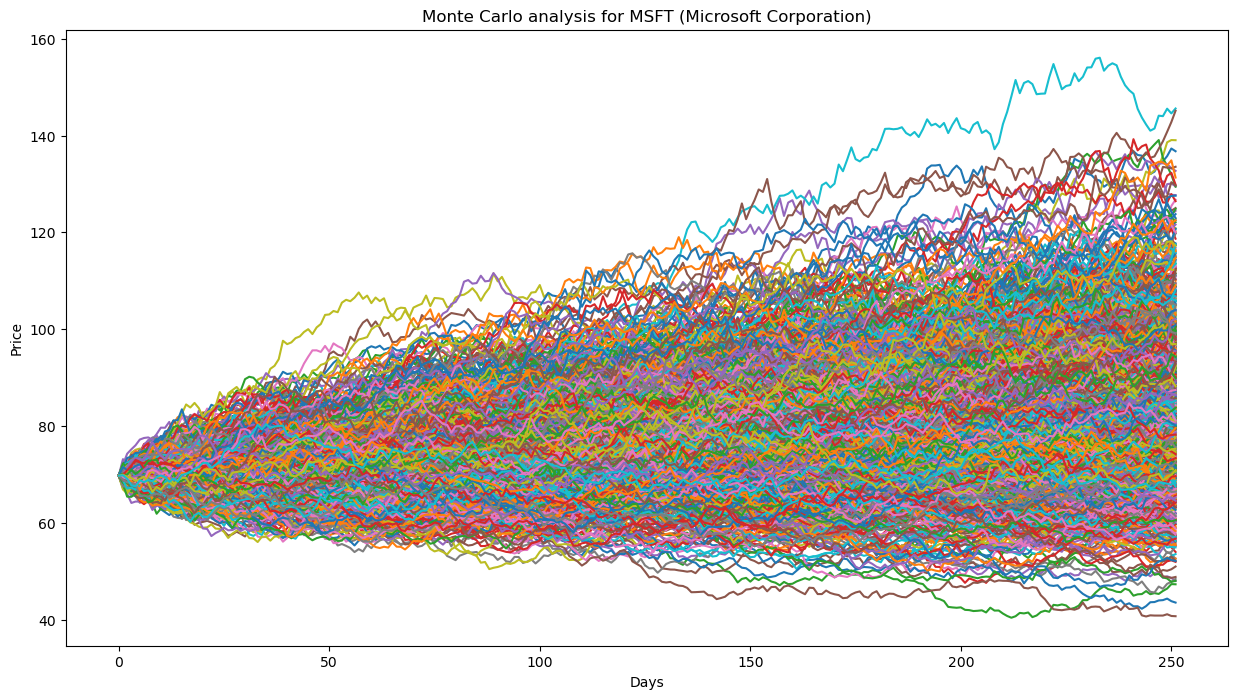

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
start_price = 69.75
days = 252  # Number of days for the simulation
mu = 0.1  # Expected return (daily)
sigma = 0.2  # Standard deviation (daily)
dt = 1/252  # Time increment (daily)

# Define the Monte Carlo function
def monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

# Simulate the Monte Carlo analysis
sim = np.zeros((1000, days))

for i in range(1000):
    result = monte_carlo(start_price, days, mu, sigma, dt)
    sim[i] = result

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(1000):
    plt.plot(sim[i])

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for MSFT (Microsoft Corporation)')

plt.show()


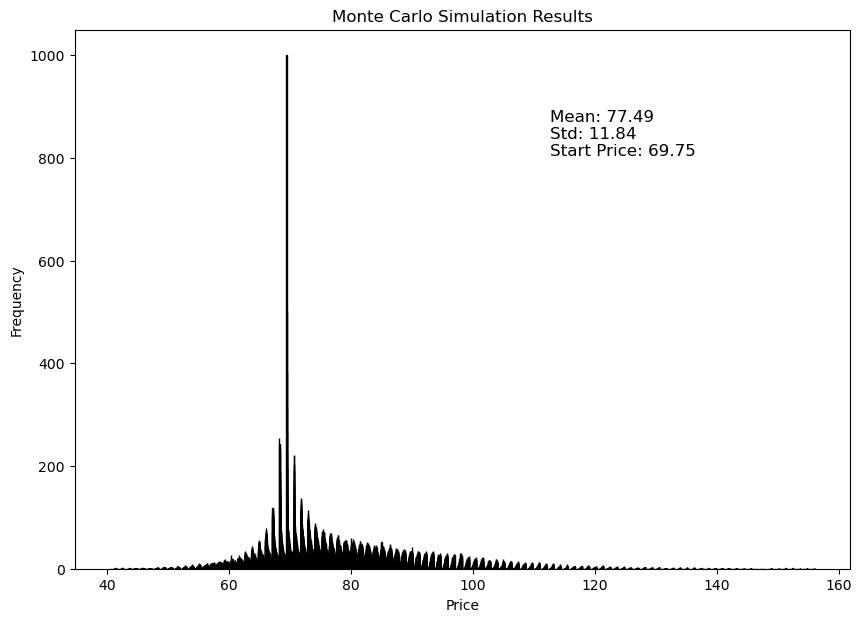

In [31]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 7))

# Create a histogram
plt.hist(sim, bins=100, edgecolor='black')

# Display mean, standard deviation, and start price as text on the plot
plt.figtext(0.6, 0.7, f"Mean: {sim.mean():.2f}\nStd: {sim.std():.2f}\nStart Price: {start_price:.2f}", fontsize=12, color='black')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation Results')

# Show the plot
plt.show()


Start price was 69.75, mean final price is 77.49. As we can see, start price is lower then final price.

In [32]:
print(Gf.tail())

             open   high    low  close    volume  MA: 10   MA: 20     MA: 30  \
timestamp                                                                      
2005-08-31  43.08  44.72  42.81  43.40  32272700  53.737  58.4205  63.364333   
2005-06-30  41.41  44.13  41.40  43.44  36150800  49.431  56.1225  60.444333   
2005-05-31  43.13  43.17  41.33  41.65  31856300  47.786  54.9635  59.255333   
2005-03-31  43.30  44.67  42.35  42.82  41040900  45.126  52.8920  57.056667   
2005-02-28  42.09  43.74  41.02  43.52  40152200  44.320  52.0560  56.290000   

            Monthly Returns  
timestamp                    
2005-08-31        -0.000921  
2005-06-30         0.042977  
2005-05-31        -0.027324  
2005-03-31        -0.016085  
2005-02-28         0.030791  


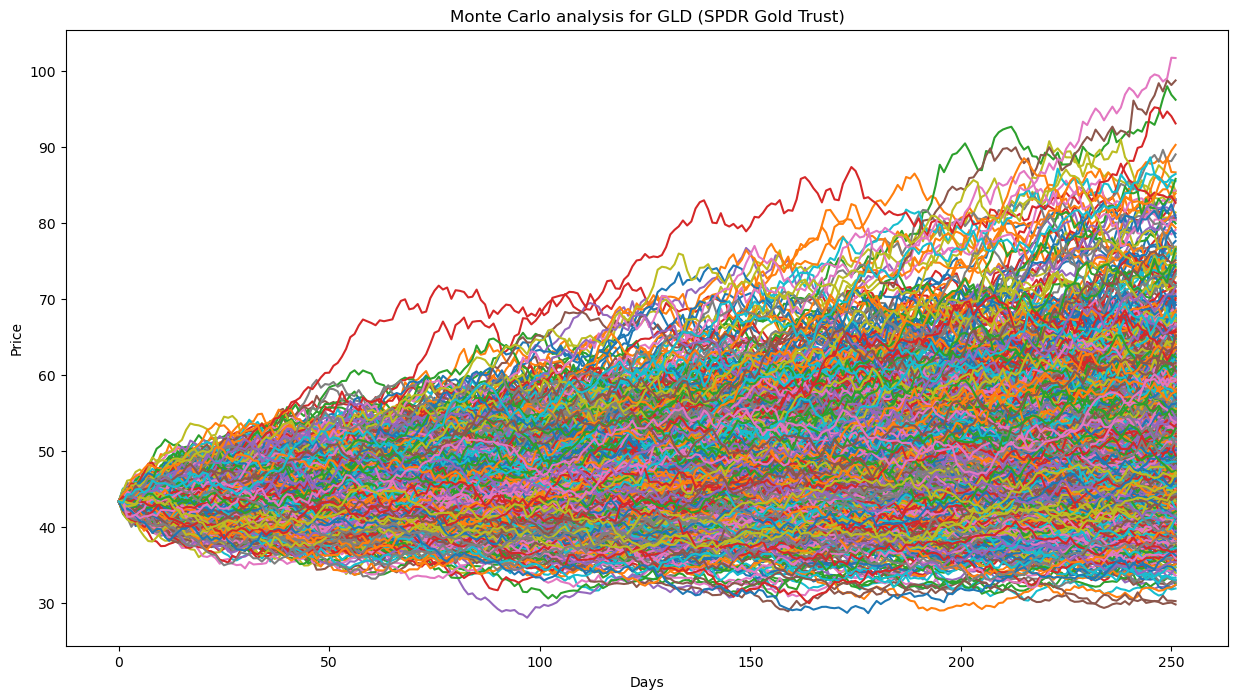

In [33]:
# Define the parameters
start_price = 43.35
days = 252  # Number of days for the simulation
mu = 0.1  # Expected return (daily)
sigma = 0.2  # Standard deviation (daily)
dt = 1/252  # Time increment (daily)

# Define the Monte Carlo function
def monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

# Simulate the Monte Carlo analysis
sim = np.zeros((1000, days))

for i in range(1000):
    result = monte_carlo(start_price, days, mu, sigma, dt)
    sim[i] = result

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(1000):
    plt.plot(sim[i])

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for GLD (SPDR Gold Trust)')

plt.show()

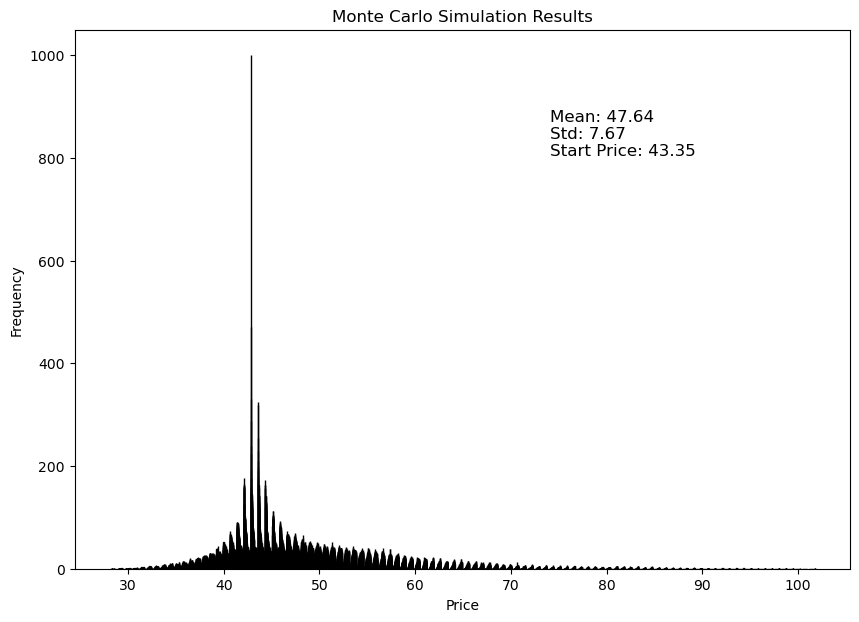

In [34]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 7))

# Create a histogram
plt.hist(sim, bins=100, edgecolor='black')

# Display mean, standard deviation, and start price as text on the plot
plt.figtext(0.6, 0.7, f"Mean: {sim.mean():.2f}\nStd: {sim.std():.2f}\nStart Price: {start_price:.2f}", fontsize=12, color='black')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation Results')

# Show the plot
plt.show()

Start price was 43.35, mean final price is 47.64. As we can see, start price is lower then final price. Although the variance is small

In [35]:
print(Qf.tail())

              open    high     low   close     volume   MA: 10   MA: 20  \
timestamp                                                                 
2000-07-31   93.50  102.10   85.72   89.44  381758100   68.030  53.1195   
2000-06-30   85.19   99.72   82.50   93.44  469516700   72.759  56.1025   
2000-05-31   95.75   96.88   72.25   83.50  563189300   77.194  58.3520   
2000-03-31  214.50  232.90  103.50  109.50  475579800   86.444  64.6365   
2000-02-29  179.10  215.00  176.90  213.50  287584900  101.956  73.6165   

               MA: 30  Monthly Returns  
timestamp                               
2000-07-31  44.367333        -0.042808  
2000-06-30  46.669667         0.119042  
2000-05-31  48.529000        -0.237443  
2000-03-31  53.828333        -0.487119  
2000-02-29  60.162000         0.190078  


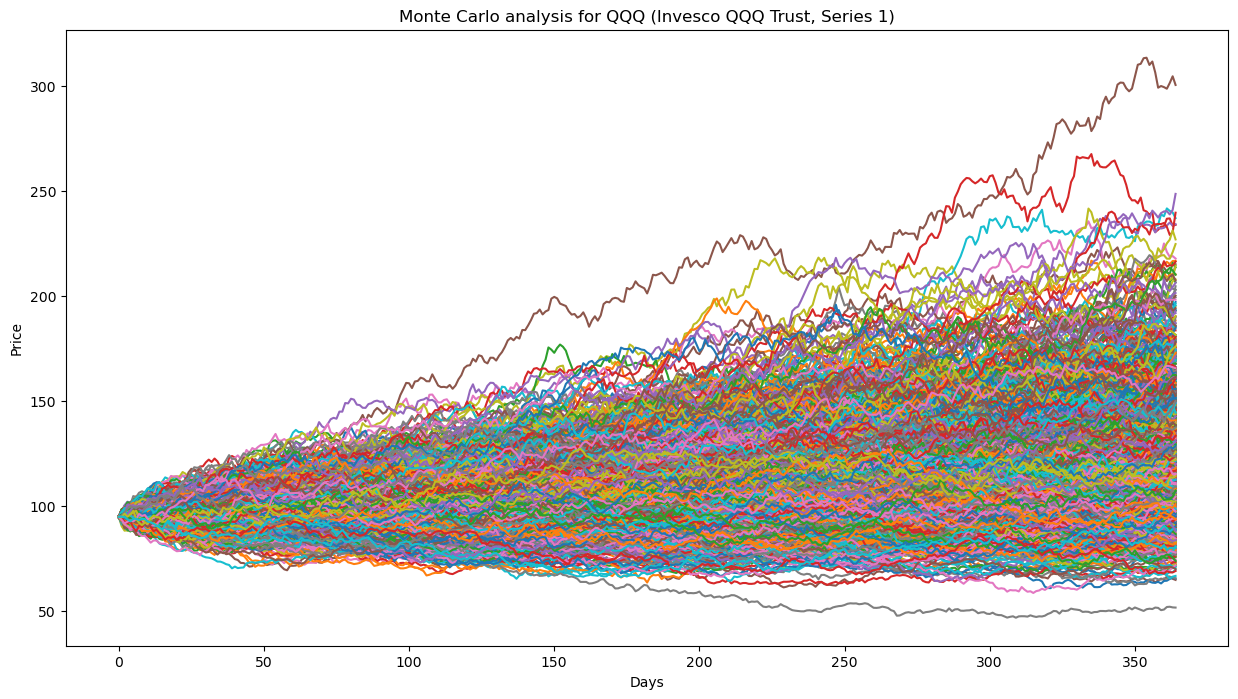

In [36]:
# Define the parameters
start_price = 94.75
days = 365  # Number of days for the simulation
mu = 0.1  # Expected return (daily)
sigma = 0.2  # Standard deviation (daily)
dt = 1/252  # Time increment (daily)

# Define the Monte Carlo function
def monte_carlo(start_price, days, mu, sigma, dt):
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt

        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

# Simulate the Monte Carlo analysis
sim = np.zeros((1000, days))

for i in range(1000):
    result = monte_carlo(start_price, days, mu, sigma, dt)
    sim[i] = result

# Plot the results
plt.figure(figsize=(15, 8))
for i in range(1000):
    plt.plot(sim[i])

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for QQQ (Invesco QQQ Trust, Series 1)')

plt.show()

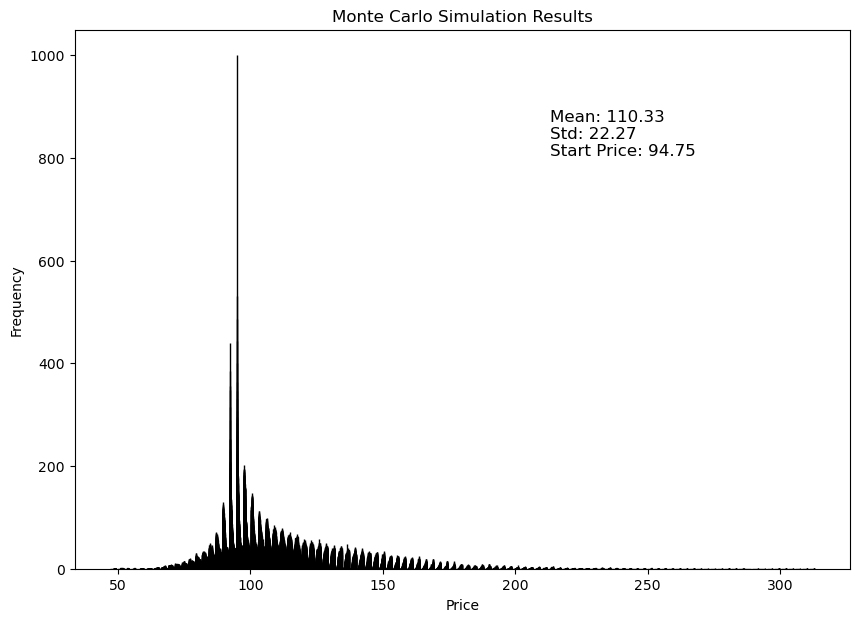

In [37]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 7))

# Create a histogram
plt.hist(sim, bins=100, edgecolor='black')

# Display mean, standard deviation, and start price as text on the plot
plt.figtext(0.6, 0.7, f"Mean: {sim.mean():.2f}\nStd: {sim.std():.2f}\nStart Price: {start_price:.2f}", fontsize=12, color='black')

# Set plot labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation Results')

# Show the plot
plt.show()

Start price was 94.75, mean final price is 110.33. As we can see, start price is lower then final price. The variance is largest here